# Analisi Pokédex
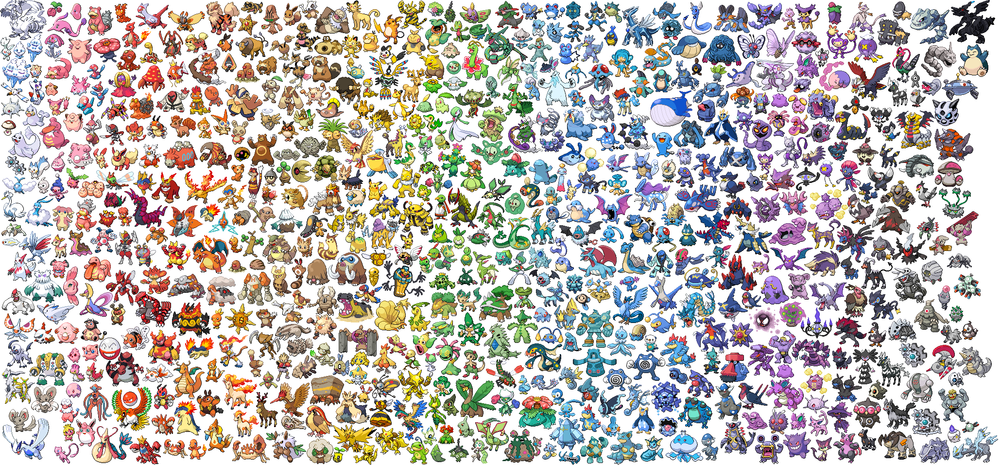

# 1. Contesto
*Pokémon* (abbreviativo di **Pocke**t **Mon**sters) è un brand giapponese pluridecennale partorito nel 1996 dalla mente di Satoshi Taijiri. Inizialmente, fu concepito a partire dalla coppia di videogiochi sviluppati da *Game Freak* per la console Nintendo *Game Boy*, *Pokémon Versione Rossa* e *Pokémon Versione Blu* (*Versione Verde*, in Giappone), ma il successo fu tale da far scaturire una produzione di massa in tanti altri contesti (cartoni, film, carte collezionabili, gadget, peluche, alcuni anche in associazione con altre società famose) così proficua da renderlo tutt'ora il franchising più redditizio di sempre, a ventisei anni, recentemente compiuti, dalla sua nascita.

La sempre più crescente richiesta del media nel corso degli anni, ha portato Nintendo, e *The Pokémon Company* in primis (la società che detiene un terzo dei diritti intellettuali del franchise, insieme con Nintendo stessa e Game Freak) a ideare sempre più creature tascabili: se inizialmente "solo" 151 approdarono nella prima coppia di videogiochi, al momento ne esistono ben 908 (non considerando tutti i bozzetti scartati, alcuni dei quali, però, riutilizzati). Inoltre, molti di questi mostriciattoli possiedono forme alternative, che ne mutano design e caratteristiche (da non confondere con le evoluzioni, che invece ne simboleggiano una crescita, da "cucciolo" fino all'"età adulta"). Di significante interesse sono, per esempio, le forme regionali, ossia forme alternative che fanno variare le caratteristiche del Pokémon in questione, in base al suo ambientamento nell'habitat di una specifica regione.\
In base al periodo di rilascio, e in base alle coppie di videogiochi che li ospitano, i Pokémon sono inoltre suddivisi in "generazioni": ogni set generazionale è delimitato da tre starter (e le loro forme evolute), ossia i Pokémon con i quali si inizia tipicamente la partita, e un numero variabile di "leggendari", ossia la specie più rara e potente presente nella fauna del rispettivo gioco; al momento, si è giunti all'ottava generazione e si è in attesa della nona, in concomitanza con l'uscita dei titoli *Pokémon Scarlatto* e *Pokémon Violetto*, verso la fine del 2022.

La serie di videogiochi si basa sul concetto di collezionare tutti i mostriciattoli tascabili – da qui lo slogan ufficiale del brand *Gotta catch 'em all!* (*Acchiappali tutti!*, in italiano) – allevarli, e diventare il Campione della Lega Pokémon della regione d'ambientazione del rispettivo videogioco, onorificienza data a quell'allevatore di Pokémon – o Allenatore, utilizzando il gergo del videogioco – che insieme alla squadra è riuscito a superare ostacoli sempre più difficili e allenatori via via sempre più forti, secondo un'idea ispirata dall'ultimo film con protagonista Bruce Lee: "*L'ultimo combattimento di Chen*".

Ogni Pokémon è caratterizzato da:
- uno o due tipi: evidenziano l'affinità del singolo Pokémon con un certo "elemento" naturale; in particolare, i 18 tipi possibili sono: Normale, Erba, Fuoco, Acqua, Elettro, Volante, Coleottero, Roccia, Terra, Acciaio, Ghiaccio, Lotta, Psico, Buio, Veleno, Spettro, Drago, Folletto;
- natura: evidenziano il carattere del Pokémon, garantendo bonus e malus sulle sue statistiche;
- quattro possibili attacchi suddivisi nei tipi precedentemente citati: l'affinità tra tipo dell'attacco e uno dei tipi del Pokémon garantisce un bonus nell'output di danno noto come *same-type attack bonus* (**STAB**);
- abilità: effetto latente secondario del Pokémon, indipendente dagli attacchi.
- sesso: maschile, femminile o asessuato; ogni Pokémon ha una certa probabilità di ritrovamento in base al sesso, se non asessuato.
- cinque statistiche: punti vita – o *Health Points* (**HP**) –, attacco, difesa, attacco speciale, difesa speciale, velocità.
- tasso di cattura: ogni Pokémon ha una certa probabilità di essere catturato, dipendente dalla sua rarità, dai suoi punti vita correnti (rispetto al totale) e da una serie di altre variabili che verranno investigate nel corso dell'analisi.

Inoltre, durante ogni battaglia, un Pokémon guadagna dei punti esperienza che, facendolo salire di livello (in un intervallo che va da 1 a 100), permettono l'incremento delle sue statistiche, l'apprendimento di nuovi attacchi e l'evoluzione in una nuova specie. 

In ogni videogioco, l'insieme di tutti i Pokémon (comprendente descrizioni sul loro comportamento e caratteristiche generali) è raccolto in un dispositivo chiamato Pokédex (abbreviativo di **Poké**mon ed In**dex**).\
Quella che si vuole fornire è una sorta di alternativa al Pokédex.

# 2. Richieste ed obiettivi (WIP)
1. Ricercare il tipo più comune.
2. Studiare le statistiche d'attacco dei Pokémon in base al loro tipo e al sesso.
3. Studiare le probabilità di ritrovamento di un Pokémon in un determinato sesso in base alla sua specie.
4. Confrontare le compatibilità e le incompatibilità tra i tipi, gli effetti delle mosse e le abilità.
5. Applicare la regressione sulle statistiche di attacco.
6. Verificare l'efficacia della classificazione. 


# 3. Raccolta dati
Per effettuare quest'analisi è stato utilizzato il dataset "Complete Pokemon Data Set", mantenuto e aggiornato da Kyle Kohnen fino al 8/12/2021, raggiungibile al seguente link: https://www.kaggle.com/kylekohnen/complete-pokemon-data-set/version/5.

Esso contiene tutti i Pokémon fino all'ottava generazione (escludendo quelli rilasciati nel più recente *Leggende Pokémon: Arceus*), e comprende tutte le forme alternative e regionali.


# 4. Esplorazione dei dati

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, gamma, laplace

pokedex = pd.read_csv("pokemon.csv")

In [3]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing                         1118 non-null   object 
 4   hp                             1118 non-null   int64  
 5   attack                         1118 non-null   int64  
 6   defense                        1118 non-null   int64  
 7   special_attack                 1118 non-null   int64  
 8   special_defense                1118 non-null   int64  
 9   speed                          1118 non-null   int64  
 10  height                         1118 non-null   int64  
 11  weight                         1118 non-null   int64  
 12  genus                          1118 non-null   o

Il dataset è molto variegato, e le sue colonne (ben 49) comprendono sia valori numerici (di diverso tipo), sia booleani e categoriali.

Di seguito, si mostrano primi cinque record per intero.

In [4]:
pokedex.head()

name  pokedex_number             abilities        typing  hp  \
0      Bulbasaur               1  Overgrow~Chlorophyll  Grass~Poison  45   
1        Ivysaur               2  Overgrow~Chlorophyll  Grass~Poison  60   
2       Venusaur               3  Overgrow~Chlorophyll  Grass~Poison  80   
3  Venusaur Gmax               3  Overgrow~Chlorophyll  Grass~Poison  80   
4  Venusaur Mega               3             Thick Fat  Grass~Poison  80   

   attack  defense  special_attack  special_defense  speed  ...  \
0      49       49              65               65     45  ...   
1      62       63              80               80     60  ...   
2      82       83             100              100     80  ...   
3      82       83             100              100     80  ...   
4     100      123             122              120     80  ...   

   ground_attack_effectiveness  fly_attack_effectiveness  \
0                          1.0                       2.0   
1                          1.0                       2.0   
2                          1.0                       2.0   
3                          1.0                       2.0   
4                          1.0                       2.0   

  psychic_attack_effectiveness  bug_attack_effectiveness  \
0                          2.0                       1.0   
1                          2.0                       1.0   
2                          2.0                       1.0   
3                          2.0                       1.0   
4                          2.0                       1.0   

   rock_attack_effectiveness  ghost_attack_effectiveness  \
0                        1.0                         1.0   
1                        1.0                         1.0   
2                        1.0                         1.0   
3                        1.0                         1.0   
4                        1.0                         1.0   

   dragon_attack_effectiveness  dark_attack_effectiveness  \
0                          1.0                        1.0   
1                          1.0                        1.0   
2                          1.0                        1.0   
3                          1.0                        1.0   
4                          1.0                        1.0   

   steel_attack_effectiveness  fairy_attack_effectiveness  
0                         1.0                         0.5  
1                         1.0                         0.5  
2                         1.0                         0.5  
3                         1.0                         0.5  
4                         1.0                         0.5  

[5 rows x 49 columns]

## 4.1 Manipolazione del dataset
Poiché la forma alternativa del singolo Pokémon, quando presente, è specificata direttamente nel suo nome, è possibile rimuovere le due colonne "is_default" e "switchable_form" in quanto ridondanti.\
Anche la colonna "pokedex_number" può essere rimossa, in quanto specifica l'index number del Pokémon in questione presente sul bestiario.
È possibile inoltre rimuovere la colonna "genus", che indica una breve descrizione del Pokémon (spesso unica per ogni famiglia evolutiva), e che risulta essere poco utile ai fini della nostra analisi. Stessa cosa per quanto riguarda la colonna "shape", la quale include informazioni relative alla forma fisica della creatura in questione. \
Avendo a disposizione i tipi, inoltre, è possibile eliminare la colonna "number_pokemon_with_typing", la quale per ogni record indica il numero di Pokémon con lo stesso tipo (record preso in esame incluso).

In [5]:
pokedex = pokedex.drop(["pokedex_number", "abilities", "is_default", "forms_switchable", "genus", "number_pokemon_with_typing", "shape"], axis=1)

Poiché molti Pokémon vantano la presenza di un doppio tipo, per praticità si sceglie di separare la colonna "typing" in due colonne "typing1" e "typing2". Da notare il fatto che, nell'attuale colonna, le stringhe sono separate dal carattere "tilde" (~), caratteristica che potrà essere sfruttata per creare un'opportuna funzione di separazione.

In [6]:
pokedex[['typing1', 'typing2']] = pokedex.typing.str.split('~', expand=True)
typing2 = pokedex.pop('typing2')
typing1 = pokedex.pop('typing1')
pokedex.insert(3,"typing1", typing1)
pokedex.insert(4,"typing2", typing2)

pokedex = pokedex.drop(["typing"], axis=1)

Stessa lavoro viene eseguito relativamente alla colonna "egg_groups".

In [7]:
pokedex[['egg_group1', 'egg_group2']] = pokedex.egg_groups.str.split('~', expand=True)
egg_group2 = pokedex.pop('egg_group2')
egg_group1 = pokedex.pop('egg_group1')
pokedex.insert(23,"egg_group1", egg_group1)
pokedex.insert(24,"egg_group2", egg_group2)

pokedex = pokedex.drop(["egg_groups"], axis=1)

Alcuni Pokémon hanno un nome proprio composto da due parole separate da un carattere di spazio. Tale carattere, verrà usato in quest'analisi come carattere di separazione dalla forma alternativa degli stessi, per cui il carattere di spaziatura verrà piuttosto sostituito da un un trattino "-" quando non utilizzato a tale scopo.

In [8]:
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if "Tapu" in x else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if "Oh" in x else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if "Nidoran" in x else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Mr Mime" else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Mime Jr" else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Mr Rime" else x)
pokedex["name"] = pokedex["name"].apply(lambda x: x.replace(' ', '-') if x == "Type Null" else x)

pokedex

name   hp  typing1 typing2  attack  defense  \
0                Bulbasaur   45    Grass  Poison      49       49   
1                  Ivysaur   60    Grass  Poison      62       63   
2                 Venusaur   80    Grass  Poison      82       83   
3            Venusaur Gmax   80    Grass  Poison      82       83   
4            Venusaur Mega   80    Grass  Poison     100      123   
...                    ...  ...      ...     ...     ...      ...   
1113             Glastrier  100      Ice    None     145      130   
1114             Spectrier  100    Ghost    None      65       60   
1115               Calyrex  100  Psychic   Grass      80       80   
1116     Calyrex Ice Rider  100  Psychic     Ice     165      150   
1117  Calyrex Shadow Rider  100  Psychic   Ghost      85       80   

      special_attack  special_defense  speed  height  ...  \
0                 65               65     45       7  ...   
1                 80               80     60      10  ...   
2                100              100     80      20  ...   
3                100              100     80     240  ...   
4                122              120     80      24  ...   
...              ...              ...    ...     ...  ...   
1113              65              110     30      22  ...   
1114             145               80    130      20  ...   
1115              80               80     80      11  ...   
1116              85              130     50      24  ...   
1117             165              100    150      24  ...   

      ground_attack_effectiveness  fly_attack_effectiveness  \
0                             1.0                       2.0   
1                             1.0                       2.0   
2                             1.0                       2.0   
3                             1.0                       2.0   
4                             1.0                       2.0   
...                           ...                       ...   
1113                          1.0                       1.0   
1114                          1.0                       1.0   
1115                          0.5                       2.0   
1116                          1.0                       1.0   
1117                          1.0                       1.0   

      psychic_attack_effectiveness  bug_attack_effectiveness  \
0                              2.0                       1.0   
1                              2.0                       1.0   
2                              2.0                       1.0   
3                              2.0                       1.0   
4                              2.0                       1.0   
...                            ...                       ...   
1113                           1.0                       1.0   
1114                           1.0                       0.5   
1115                           0.5                       4.0   
1116                           0.5                       2.0   
1117                           0.5                       1.0   

      rock_attack_effectiveness  ghost_attack_effectiveness  \
0                           1.0                         1.0   
1                           1.0                         1.0   
2                           1.0                         1.0   
3                           1.0                         1.0   
4                           1.0                         1.0   
...                         ...                         ...   
1113                        2.0                         1.0   
1114                        1.0                         2.0   
1115                        1.0                         2.0   
1116                        2.0                         2.0   
1117                        1.0                         4.0   

      dragon_attack_effectiveness  dark_attack_effectiveness  \
0                             1.0                        1.0   
1                             1.0                

Infine, stando alle specifiche del dataset, le altezze dei Pokémon sono definite in decimetri sulla colonna "height", ed i loro pesi in ettogrammi sulla colonna "weight": potrebbe risultare più conveniente convertire queste grandezze rispettivamente in metri e chilogrammi (come visualizzate nei vari videogiochi, in pratica).

In [9]:
pokedex['height'] = pokedex['height']/10
pokedex['weight'] = pokedex['weight']/10

## 4.2 Distribuzione dei dati
Di seguito si visualizzano le informazioni del dataset e i suoi primi cinque record, dopo la sua manipolazione.

In [10]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   hp                             1118 non-null   int64  
 2   typing1                        1118 non-null   object 
 3   typing2                        597 non-null    object 
 4   attack                         1118 non-null   int64  
 5   defense                        1118 non-null   int64  
 6   special_attack                 1118 non-null   int64  
 7   special_defense                1118 non-null   int64  
 8   speed                          1118 non-null   int64  
 9   height                         1118 non-null   float64
 10  weight                         1118 non-null   float64
 11  gen_introduced                 1118 non-null   int64  
 12  female_rate                    1118 non-null   f

In [11]:
pokedex.head()

name  hp typing1 typing2  attack  defense  special_attack  \
0      Bulbasaur  45   Grass  Poison      49       49              65   
1        Ivysaur  60   Grass  Poison      62       63              80   
2       Venusaur  80   Grass  Poison      82       83             100   
3  Venusaur Gmax  80   Grass  Poison      82       83             100   
4  Venusaur Mega  80   Grass  Poison     100      123             122   

   special_defense  speed  height  ...  ground_attack_effectiveness  \
0               65     45     0.7  ...                          1.0   
1               80     60     1.0  ...                          1.0   
2              100     80     2.0  ...                          1.0   
3              100     80    24.0  ...                          1.0   
4              120     80     2.4  ...                          1.0   

   fly_attack_effectiveness  psychic_attack_effectiveness  \
0                       2.0                           2.0   
1                       2.0                           2.0   
2                       2.0                           2.0   
3                       2.0                           2.0   
4                       2.0                           2.0   

   bug_attack_effectiveness  rock_attack_effectiveness  \
0                       1.0                        1.0   
1                       1.0                        1.0   
2                       1.0                        1.0   
3                       1.0                        1.0   
4                       1.0                        1.0   

   ghost_attack_effectiveness  dragon_attack_effectiveness  \
0                         1.0                          1.0   
1                         1.0                          1.0   
2                         1.0                          1.0   
3                         1.0                          1.0   
4                         1.0                          1.0   

   dark_attack_effectiveness  steel_attack_effectiveness  \
0                        1.0                         1.0   
1                        1.0                         1.0   
2                        1.0                         1.0   
3                        1.0                         1.0   
4                        1.0                         1.0   

   fairy_attack_effectiveness  
0                         0.5  
1                         0.5  
2                         0.5  
3                         0.5  
4                         0.5  

[5 rows x 44 columns]

Esso conta 1118 record. Si notino i conteggi relativi alle colonne "typing2" e "evolves_from": sebbene siano di meno, non deve considerarsi un errore, bensì come un aspetto da non trascurare; infatti non tutti i Pokémon presentano un doppio tipo, e non tutti i Pokémon sono in grado di evolversi. 

In [12]:
dex_type = pokedex["typing1"].value_counts() + pokedex["typing2"].value_counts()
dex_type = dex_type.sort_values(ascending = False)
dex_type

Water       162
Flying      135
Normal      130
Grass       124
Psychic     123
Bug          96
Electric     89
Rock         89
Fire         88
Poison       85
Ground       82
Fighting     78
Dragon       78
Steel        77
Dark         76
Ghost        73
Fairy        72
Ice          58
dtype: int64

<AxesSubplot:>

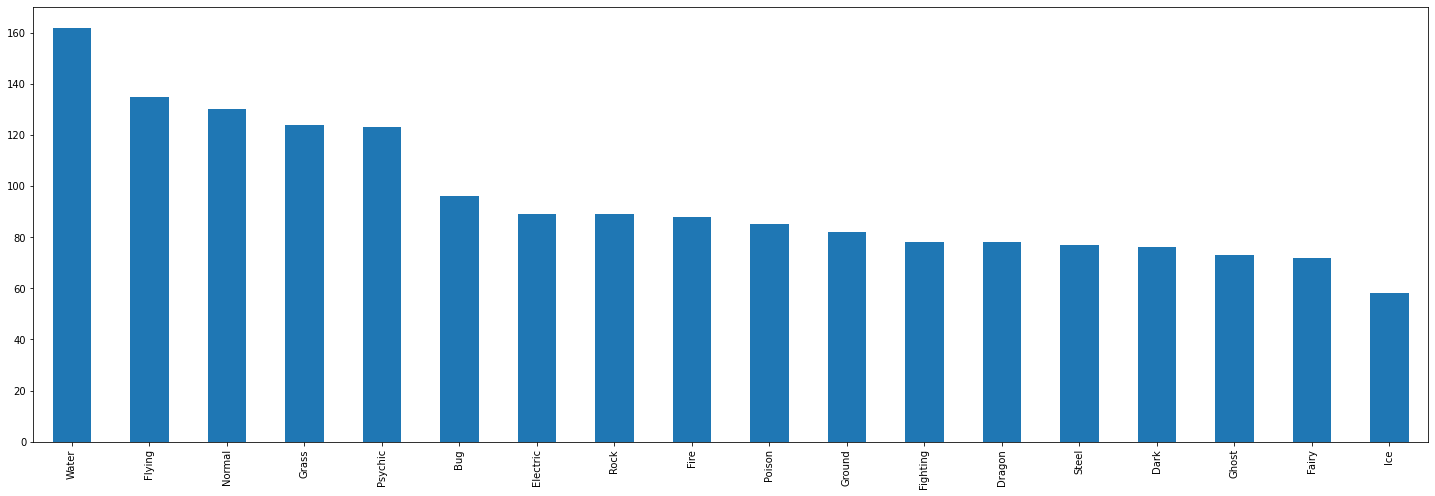

In [13]:
dex_type.plot.bar(figsize=(25,8))

Visto che alcuni Pokémon, cambiando forma, cambiano anche uno dei due tipi, nel conteggio vengono considerate anche le eventuali forme alternative: quello più comune, è il tipo Acqua.
Potrebbe essere interessante scoprire quante forme alternative sono state introdotte nel corso delle varie generazioni, sfruttando il blank char separatore.

In [14]:
alternative_forms_by_gen = pokedex.groupby('gen_introduced')['name'].apply(lambda x: x[x.str.contains(' ')].count())
alternative_forms_by_gen

gen_introduced
1    71
2     8
3    31
4    18
5    23
6    20
7    44
8    35
Name: name, dtype: int64

È possibile notare come siano state proposte, nel corso degli anni, più forme alternative per i Pokémon di prima generazione, tra Mega Evoluzioni, Gigamax e forme regionali. Ciò è dovuto ad un forte attaccamento del brand nei confronti delle sue origini, e ad una continua nostalgia di quei tempi da parte dei suoi fan.

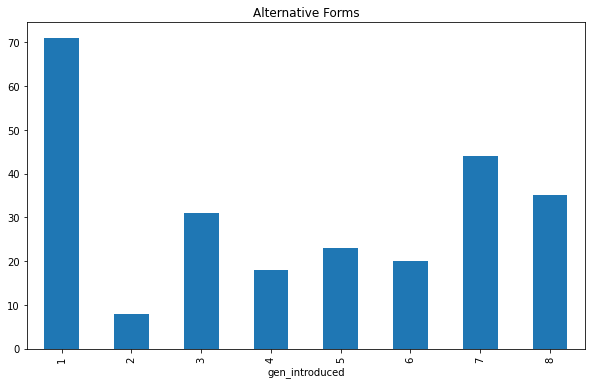

In [15]:
plt.figure(figsize=(10,6))
alternative_forms_by_gen.plot(title="Alternative Forms", kind="bar")
plt.show()

Entrando più nello specifico, osserviamo in quali generazioni le due "gimmick" Mega Evoluzione e Gigamax sono più ricorrenti. Per inciso, queste due tipologie di forme alternative sono state introdotte rispettivamente in sesta e ottava generazione, e poi fornite anche a creature facenti parte di set generazionali passati.

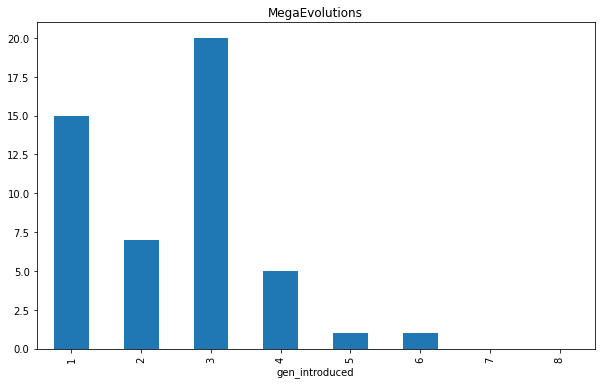

In [16]:
plt.figure(figsize=(10,6))
megas_by_gen = pokedex.groupby('gen_introduced')['name'].apply(lambda x: x[x.str.contains('Mega')].count())
megas_by_gen.plot(title="MegaEvolutions", kind="bar")
plt.show()

È possibile notare come il set generazionale più ricco di Mega Evoluzioni sia il terzo, seguito immediatamente dal primo. Curiosità da parte di chi scrive e conosce molto bene il brand: se la causa del numero di Mega Evoluzioni per i Pokémon di prima generazione è da ritrovarsi principalmente nella nostalgia, come già spiegato in precenza, il primato della terza lo si deve al fatto che nel periodo della sesta generazione (più precisamente alla fine del 2014) è stata rilasciata la coppia di videogiochi *Pokémon: Rubino Omega* e *Pokémon: Zaffiro Alfa* per Nintendo 3DS, versioni aggiornate degli originali *Pokémon: Versione Rubino* e *Pokémon: Versione Zaffiro* usciti undici anni prima per il GameBoy Advance. The Pokémon Company ha quindi approfittato dell'occasione per aggiungere nuovi contenuti sfruttando una gimmick recentemente introdotta.

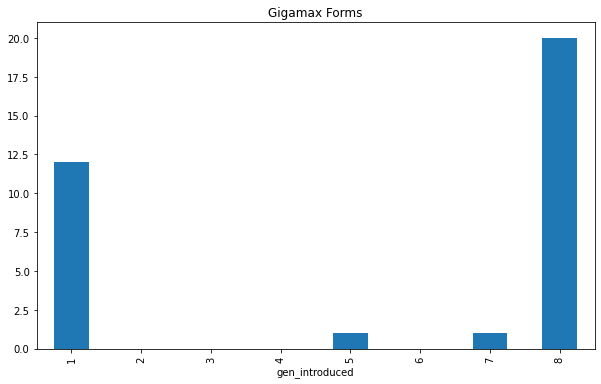

In [17]:
plt.figure(figsize=(10,6))
gmax_by_gen = pokedex.groupby('gen_introduced')['name'].apply(lambda x: x[x.str.contains('Gmax')].count())
gmax_by_gen.plot(title="Gigamax Forms", kind="bar")
plt.show()

Numeri interessanti anche relativamente alla Gigamax. La gimmick "Gigamax" è una versione particolare della "Dynamax", introdotta nei relativamente recenti *Pokémon: Spada* e *Pokémon: Scudo*: se quest'ultima ingigantisce i Pokémon senza variarne l'aspetto, la prima, qui presa invece in esame, dona inoltre nuove sembianze al Pokémon che ne fa utilizzo. Il set generazionale più fornito di forme Gigamax è proprio l'ottavo, il quale non a caso è il medesimo che ha introdotto questa nuova meccanica di gioco; esso è seguito immediatamente dal primo, surclassando tutti gli altri set generazionali.

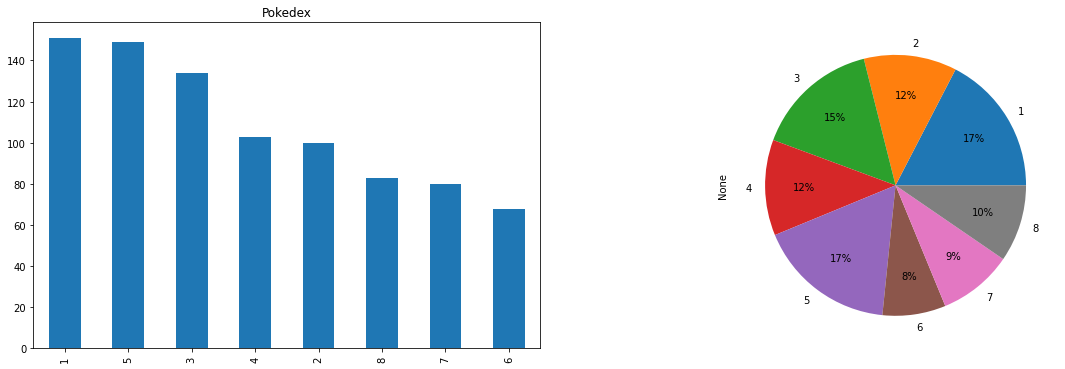

In [18]:
pokemon_by_gen = pokedex["gen_introduced"].value_counts() - alternative_forms_by_gen

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
pokemon_by_gen.sort_values(ascending = False).plot(title="Pokedex", kind="bar")
plt.subplot(1,2,2)
pokemon_by_gen.plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)
plt.show()

Osserviamo i numeri di Pokémon introdotti nel corso delle varie generazioni, escludendo le forme alternative (e quindi eventuali "doppioni" omonimi): è possibile notare che il numero maggiore fu introdotto in prima generazione, agli albori del franchise; questo numero è seguito da quello relativo ai Pokémon introdotta in quinta e in terza generazione. Numeri che non stupiscono, considerando che la la terza e la quinta generazione soprattutto sono state quelle della "rivoluzione" del brand, il quale cercava di modernizzarsi e stare al passo con i tempi (soprattutto in termini di stile e design) il più possibile.

Analizziamo adesso le PDF delle colonne relative alle statistiche dei Pokémon.

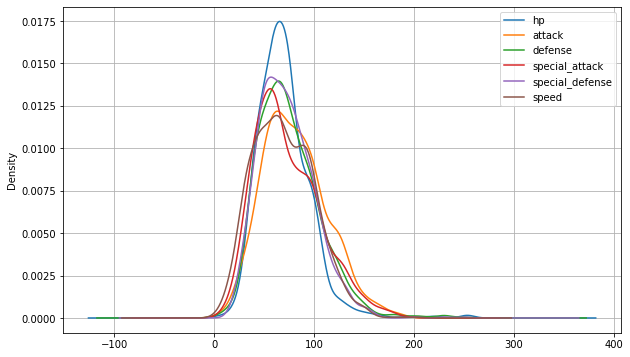

In [19]:
pokedex[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].plot.density(figsize=(10,6))
plt.grid()
plt.show()

Le statistiche sono distribuite secondo un andamento gaussiano. 

È possibile notare un picco sulla colonna "hp", dovuto principalmente a pochi Pokémon con tanti punti vita (come Chansey, Blissey - il quale ha il maggior numero di HP in assoluto -, Audino e qualche leggendario).

Potrebbe essere interessante osservare anche le PDF relative ad altri tratti caratterizzanti dei Pokémon, che non sono legati alle statistiche utilizzate in battaglia.

Ogni Pokémon, infatti, in base alla sua rarità e al suo stadio evolutivo, è caraterizzato anche da un tasso di cattura. Sin dalle prime versioni dei videogiochi, questo valore era codificato in una word da 8 bit, per cui è stato mantenuto questo criterio sino alle versioni più recenti, facendolo variare in un range [0,255]. Di seguito si analizza la sua PDF.

Tale valore viene essere utilizzato come "scala" nel momento in cui si cerca di catturare un Pokémon. Difatti, ogni volta che, ingaggiata una lotta con un Pokémon selvatico, lo si cerca di catturare, il videogioco calcolerà se esso è stato calcolato o meno secondo la seguente formula mostrata per completezza esplicativa.

$a=\frac{(3 \times HP_{max} - 2 \times HP_{actual}) \times rate \times bonus_{ball}}{3 \times HP_{max}} \times status$

dove:
- $rate$ è il capture_rate qui normalizzato;
- $bonus_{ball}$ è un valore dipendente dalla Pokéball utilizzata per la cattura (valore di scala che varia da $\times 1$ a $\times 8$, a seconda della ball utilizzata);
- $status$ è un malus inflitto al Pokémon avversario: paralisi, scottatura, addormentamento, avvelenamento, congelamento (valore di scala che può essere $\times 1,\times 1.5, \times 2$ a seconda del tipo di status). 

In realtà, nel corso degli anni, sono state aggiunte altre variabili, ma all'atto pratico, la formula di base è quella descritta.

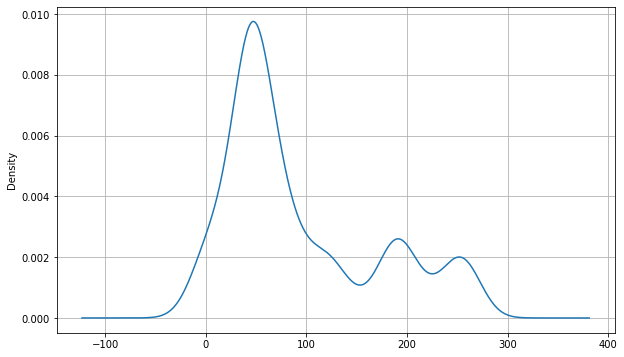

In [20]:
plt.figure(figsize=(10,6))
pokedex['capture_rate'].plot.density().grid()
plt.show()

Si noti come la distribuzione del catch_rate abbia una forma di "mixture" di tre di Gaussiane, per cui questo attributo si distribuisce secondo un andamento multimodale, secondo il quale possiamo suddividere i Pokémon, a seconda del loro "catch_rate", in tre diverse categorie:
- esemplari molto comuni nella fauna, e quindi più inclini ad essere catturati;
- Pokémon più rari, e quindi più difficili da catturare;
- creature uniche nella fauna, e quindi col più basso tasso di cattura.

Questa suddivisione potrebbe essere utile, nei prossimi paragrafi, per poter eseguire una classificazione in base a determinate caratteristiche.

Verifichiamo quali sono le probabilità di incontrare un Pokémon di un certo sesso.

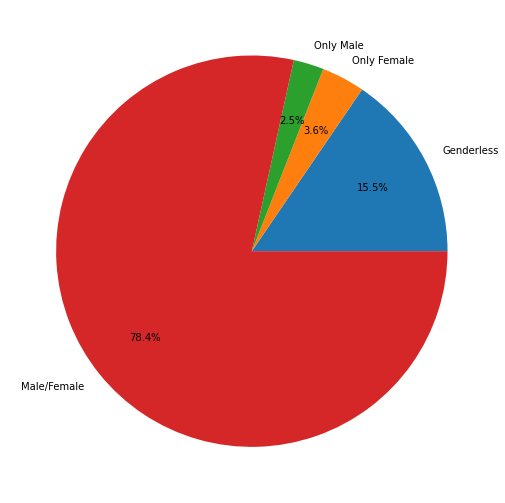

In [21]:
genderless = len(pokedex[pokedex['genderless']==True]['genderless'])                               # numero di asessuati
only_female = len(pokedex[pokedex['female_rate']==1]['female_rate'])                               # numero di pkmn 100% femmina
only_male = pokedex[pokedex['female_rate']==0]
only_male = len(only_male[only_male['genderless']!=True]['female_rate'])                           # numero di pkmn 100% maschio

gender = len(pokedex[pokedex['genderless']==False]['female_rate']) - only_female - only_male       # numero di pknm che possono essere maschio o femmina

counts = [genderless, only_female, only_male, gender]
labels = ['Genderless', 'Only Female', 'Only Male', 'Male/Female']

plt.figure(figsize=(15,9))
plt.pie(counts, autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels=labels)
plt.show()

È possibile constatare che la stragrande maggioranza di specie di Pokémon può essere trovata nella fauna sia con sesso maschile che con sesso femminile. Questa statistica è succeduta immediatamente da esemplari asessuati, i quali tipicamente sono Pokémon leggendari o Pokémon comuni ispirati a oggetti. Infine, troviamo esemplari di solo sesso femminile e di solo sesso maschile, di cui quest'ultimi sono presenti in minoranza.

Osserviamo adesso le *pdf* di altezza e peso.

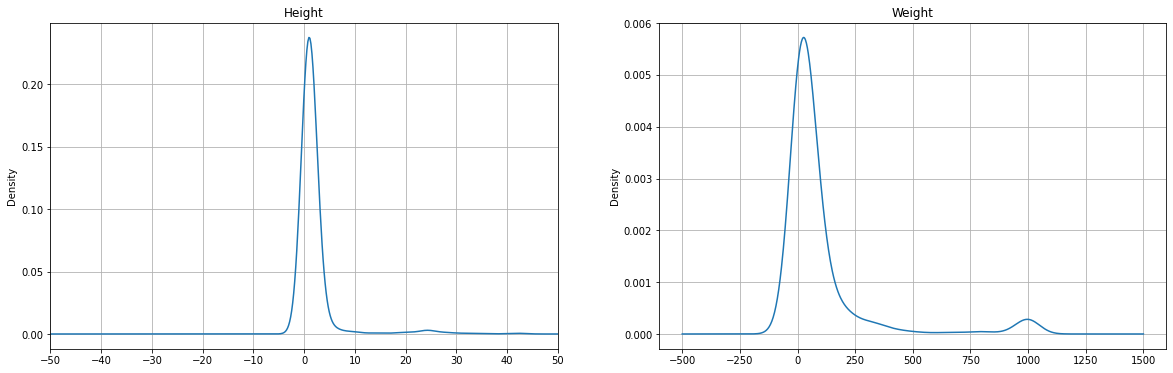

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
pokedex['height'].plot.density()
plt.title('Height')
plt.xlim([-50,50])
plt.xticks(np.arange(-50, 50+1, 10))
plt.grid()

plt.subplot(1,2,2)
plt.title('Weight')
pokedex['weight'].plot.density()
plt.grid()

plt.show()

È possibile notare che entrambi gli attributi sono distribuiti secondo una mixture di due Gaussiane. Ciò indica che sono presenti due mode, infatti:
- per quanto concerne l'altezza, molti esemplari misurano tra i pochi centimetri e fino a 8 metri circa, ma sono comunque presenti alcune specie tra i 20 e i 30 metri;
- il peso varia fino a 250 kg, ma alcuni di essi (per lo più leggendari) pesano attorno alla tonnellata.

Da questa prima analisi, è possibile comprendere che l'intera popolazione di Pokémon è suddivisa in realtà in delle sotto-popolazioni, sia in base alle loro statistiche in battaglia ed il tasso di cattura, sia in base ai loro tratti fisici.
A tal proposito, i tre attributi booleani "baby_pokemon", "legendary" e "mythical" ci aiutano a individuare queste tre popolazioni.
In particolare:
- i Pokémon Baby sono dei Pokémon non ancora in grado di riprodursi; infatti, in seconda generazione, con l'avvento di *Pokémon: Versione Oro*, *Pokémon: Versione Argento* e *Pokémon: Versione Cristallo*, usciti per la console *GameBoy Color* intorno agli anni 2000, è stato introdotto il concetto di breeding. Quasi tutti i Pokémon (principalmente quelli non asessuati) possono accoppiarsi: infatti solo alcune specie sono compatibili (in base al loro Gruppo Uova, presentato nella colonna "egg_group" e che verrà analizzato in seguito)  e possono farlo solo se Pokémon non-baby;
- i Pokémon leggendari sono gli esemplari più potenti presenti nella fauna del rispettivo videogioco. Alcuni di essi sono presentati nella copertina della rispettiva versione di gioco. Si tratta di esemplari unici, che possono essere catturati solamente una volta nella partita;
- i Pokémon mitici (o più comunemente chiamati in italiano "misteriosi") sono così definiti in quanto rari non solo dentro il gioco, ma sfondando la quarta parete, anche al di fuori del gioco stesso. Si tratta di esemplari talmente rari da non poter essere trovati neanche nella fauna del videogioco, e per ottenerli è necessario partecipare a eventi vari (spesso presso la nota catena di videogiochi GameStop), fiere del fumetto o mediante contenuti scaricabili di terze parti rilasciati da The Pokémon Company solo per un limitato periodo di tempo.

Suddividiamo il dataset in base alle sotto-popolazioni individuate (sfruttando le colonne booleane "baby_pokemon", "legendary" e "mythical").

In [23]:
attr = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'capture_rate', 'female_rate', 'height', 'weight', 'base_experience', 'base_happiness', 'egg_cycles']
stats = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
traits = ['height', 'weight', 'base_experience', 'base_happiness', 'egg_cycles']

baby = pokedex[pokedex['baby_pokemon']==True][attr]
leg = pokedex[pokedex['legendary']==True][attr]
myth = pokedex[pokedex['mythical']==True][attr]

common = pokedex[pokedex['baby_pokemon']==False]
common = common[common['legendary']==False]
common = common[common['mythical']==False]
common = common[attr]

subpops = ['Common', 'Baby', 'Legendary', 'Mythical']

Analizziamo prima le frequenze di queste tre sotto-popolazioni in generale, e successivamente i loro rilasci col passare delle generazioni, statistiche entrambe osservate considerando le varie forme alternative.

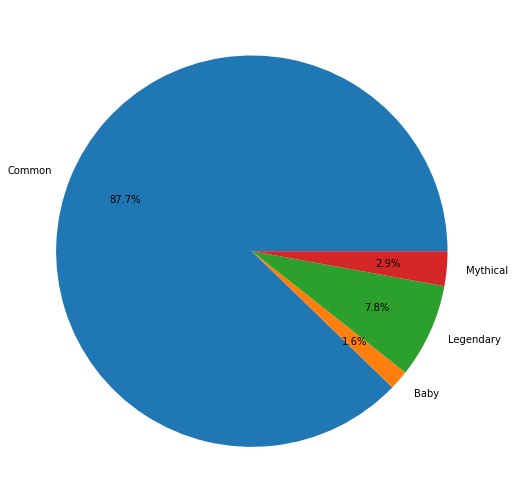

In [24]:
commons = len(common)
legendaries = len(leg)
mythical = len(myth)
babies = len(baby)

pkmn_sub = [commons, babies, legendaries, mythical]

plt.figure(figsize=(15,9))
plt.pie(pkmn_sub, autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels=subpops)
plt.show()

<AxesSubplot:xlabel='gen_introduced'>

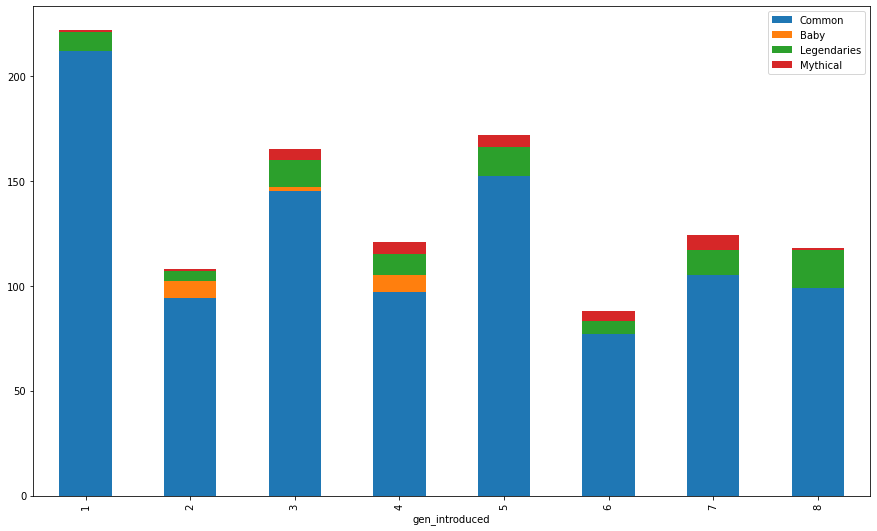

In [25]:
pkmn_baby_bygen = pokedex.groupby('gen_introduced')['baby_pokemon'].apply(lambda x: x[x==True].count()) 
pkmn_leg_bygen = pokedex.groupby('gen_introduced')['legendary'].apply(lambda x: x[x==True].count())
pkmn_myth_bygen = pokedex.groupby('gen_introduced')['mythical'].apply(lambda x: x[x==True].count())

pkmn_common_bygen = pokedex['gen_introduced'].value_counts() - pkmn_baby_bygen - pkmn_leg_bygen - pkmn_myth_bygen

labels = pkmn_baby_bygen.index

plotdata = pd.DataFrame({"Common":pkmn_common_bygen.values,
                        "Baby":pkmn_baby_bygen.values,
                        "Legendaries":pkmn_leg_bygen.values,
                        "Mythical":pkmn_myth_bygen.values},
                        index=labels)

plotdata.plot.bar(stacked=True, figsize=(15,9))

Dal grafico a torta, è ovvio constatare che i Pokémon meno comuni in assoluto sono i baby, di cui la cui maggior parte sono stati introdotti in seconda e in quarta generazione. Durante la seconda, proprio per l'avvento del breeding, e durante la quarta, perché The Pokémon Company stava cercando di approfondire ancor di più le origini dei Pokémon da un punto di vista narrativo; per cui, introdurre delle pre-evoluzioni e delle evoluzioni di Pokémon già esistenti in generazioni passate era il minimo per poter mantenere questa promessa.

D'altra parte, non stupisce la scarsa presenza di mitici e leggendari, i quali però sono aumentati col passare degli anni. La crescita dei misteriosi è principalmente dovuta all'uscita di prodotti cinematografici che vedono come primi protagonisti proprio i Pokémon misteriosi, in occasione dei quali ricorrevano gli eventi di distribuzione precedentemente citati. A tal proposito, si prenda come esempio la terza generazione: i Pokémon misteriosi di terza generazione sono Jirachi e Deoxys, entrambi protagonisti di due lungometraggi spin-off della serie animata, ossia *Pokémon: Fratello dallo spazio* e *Pokémon: Jirachi: wish maker*.

Infine, altri tre attributi da esaminare durante questa prima fase di analisi, sono quelli relativi alla crescita di un Pokémon: esperienza, felicità e capacità di evoluzione.
Ogni qual volta si termina con successo una lotta, un Pokémon accumula una certa quantità di punti esperienza: raggiunto un cewrto gap di esperienza, esso sale poi di livello (in un range [1,100]), permettendo così un incremento delle sue statistiche di combattimento e l'apprendimento di nuove mosse di combattimento (in totale possono esserne apprese fino a quattro). È importante constatare che per ogni livello, il quantitativo di punti necessari per arrivare al successivo aumenta. Inoltre, raggiunto un certo livello, spesso un esemplare può evolversi, mutando il suo aspetto, le sue statistiche, e delle volte anche il suo tipo. 
Altro valore che per ogni Pokémon in squadra incrementa continuamente (in base a quanto tempo li si tengono in squadra e in base al numero di lotte eseguite con ognuno di essi) è la felicità.

Non tutti i Pokémon possono evolversi (mentre alcuni possono avere degli stadi evolutivi ramificati, visto che l'incremento del livello non è l'unico metodo evolutivo, si pensi alla felicità massima come uno di questi metodi), ma è vero che tutti quanti guadagnano un certo cumulativo di esperienza in base al Pokémon sconfitto (e al loro numero, naturalmente).

A questo proposito, la colonna "base_experience" indica la quantità di punti esperienza che viene guadagnata in base al Pokémon sconfitto, senza applicare nessun moltiplicatore relativo a quanti ne sono stati sconfitti. 
La colonna "base_happiness" indica invece il quantitativo di felicità che un Pokémon ha quando viene catturato (in un range [0,255]).

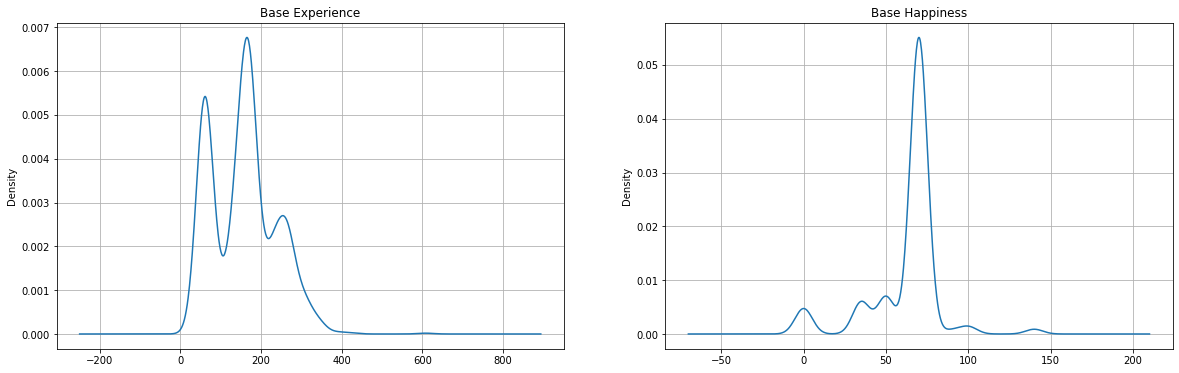

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(121)
pokedex['base_experience'].plot.density()
plt.title("Base Experience")
plt.grid()
plt.subplot(122)
pokedex['base_happiness'].plot.density()
plt.title("Base Happiness")
plt.grid()
plt.show()

Com'è possibile notare dalla PDF dell'esperienza di base, anche in questo caso la popolazione è suddivisa secondo tre mode. Ciò indica che, in base alla sua categoria, il Pokémon sconfitto fornirà un quantitativo di esperienza medio che varierà rispetto a quello di un'altra catogoria (per esempio, un leggendario piuttosto che un esemplare comune).

Anche la felicità presenta un andamento multimodale: sebbene un numero di Pokémon spicchi rispetto agli altri, ossia quelli con felicità attorno ai 60/80 punti di felicità base, troviamo anche dei Pokémon con esattamente 0 punti esperienza (e qualche altro con una quantità di punti tra i 25 ed i 50).

<AxesSubplot:>

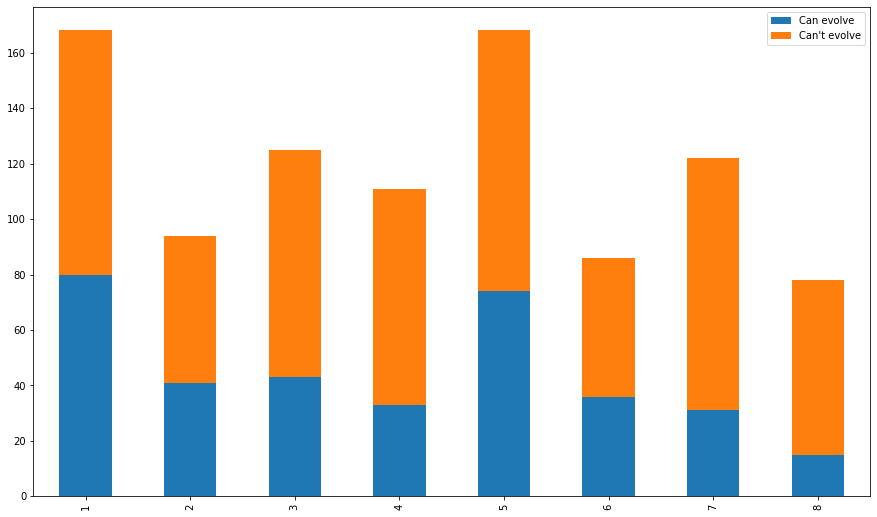

In [27]:
pkmn_w_evo = pokedex[pokedex['can_evolve']==True]['gen_introduced'].value_counts() - megas_by_gen - gmax_by_gen
pkmn_wo_evo = pokedex[pokedex['can_evolve']==False]['gen_introduced'].value_counts() - megas_by_gen - gmax_by_gen

labels = pkmn_w_evo.index

plotdata = pd.DataFrame({"Can evolve":pkmn_w_evo.values,
                        "Can't evolve":pkmn_wo_evo.values},
                        index=labels)

plotdata.plot.bar(stacked=True, figsize=(15,9))

In questo caso, conteggiando le forme alternative (visto che alcune forme regionali dello stesso Pokémon possono avere evoluzioni, e altre no), e scartando i record relativi alle Mega Evoluzioni e le Gigamax (le quali, essendo gimmick temporanee da usare in lotta, non possono avere evoluzioni) si può notare che poco meno della metà dei Pokémon introdotti in ogni generazione è in grado di evolversi. C'è da considerare che tra tutti i Pokémon che non si possono evolvere sono presenti mitici e leggendari (fatta eccezione per le linee evolutive di *Cosmog* e *Type: Null*).

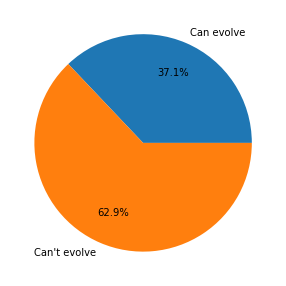

In [28]:
plt.figure(figsize=(10,5))
plt.pie([pkmn_w_evo.sum(), pkmn_wo_evo.sum()], autopct='%1.1f%%', pctdistance=0.7, labeldistance=1.1, labels=["Can evolve", "Can't evolve"])
plt.show()

In particolare, possiamo notare che molto meno della metà dei Pokémon in totale, comprese forme alternative, sono in grado di evolversi. Questo è dovuto non solo alla presenza dei mitici e dei leggendari, e degli esemplari mono-stadio, ma a tutti quei Pokémon al loro stadio finale che non possono evolversi ulteriormente (si pensi, per esempio, a *Venusaur*, *Blastoise* e *Charizard*).

Si analizzano, infine, le compatibilità di breeding e il numero di passi necessari per far schiudere un uovo.

<AxesSubplot:>

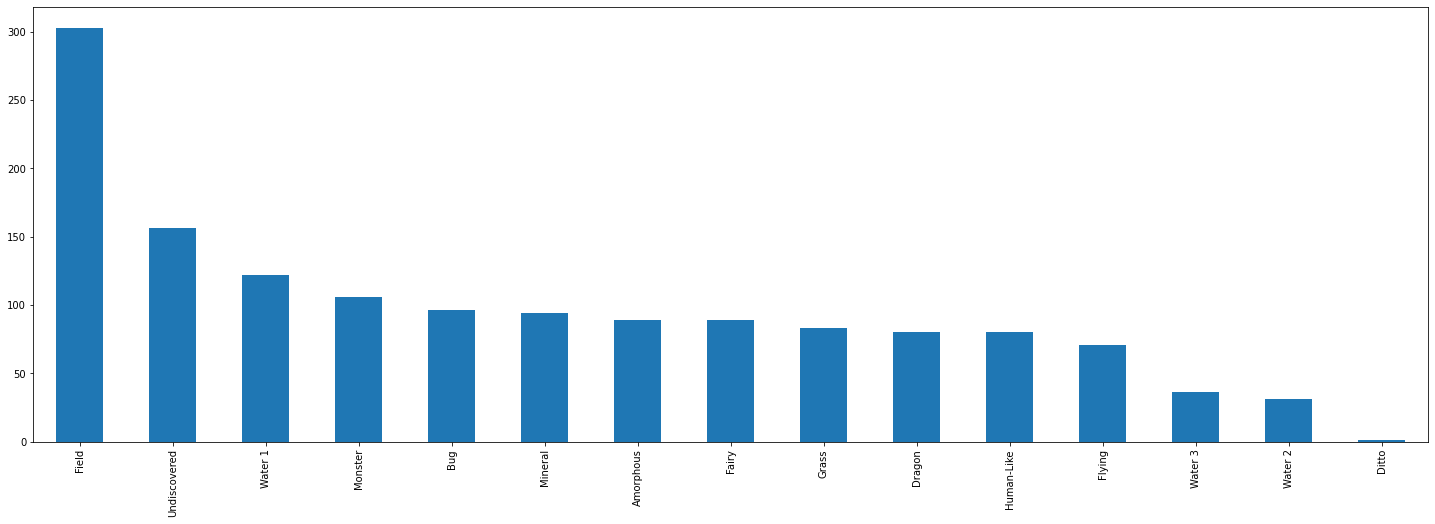

In [29]:
dex_egg_groups = pokedex["egg_group1"].value_counts().add(pokedex["egg_group2"].value_counts(), fill_value=0)
dex_egg_groups = dex_egg_groups.sort_values(ascending = False)
dex_egg_groups.plot.bar(figsize=(25,8))

Si noti come i gruppi più frequenti sono "Field", "Undiscovered" e "Water 1".
In particolare, nel primo gruppo troviamo la stramaggioranza dei Pokémon che si trovano nell'erba alta, nel secondo ritroviamo tutti i Leggendari/Mitici e asessuati più in generale, mentre nel terzo gruppo l'alta percentuale di Pokémon di tipo acqua.

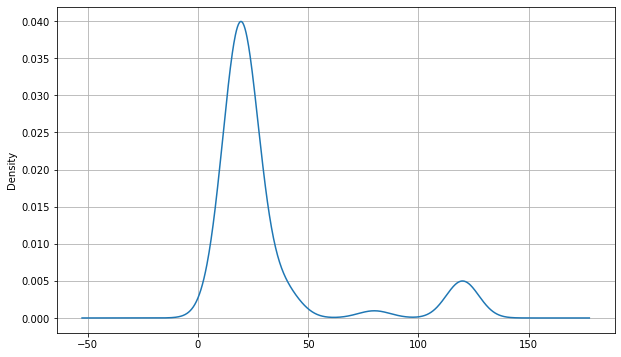

In [30]:
plt.figure(figsize=(10,6))
pokedex['egg_cycles'].plot.density().grid()
plt.show()

Infine, si noti come anche nella schiusura delle uova sia presente un andamento multimodale, con la gaussiana nell'intervallo [0,50] che fa da moda assoluta. Naturalmente in questo caso si dovrà escludere l'ipotesi di suddivisione della popolazione in base a leggendari, mitici e comuni, ma è comunque un aspetto importante che potrà essere analizzato nelle fasi successive.

## 4.2 Statistica descrittiva

Analizziamo in maniera generica i tratti primari e secondari del Pokémon, quali statistiche di base utilizzate in battaglia e i loro tratti secondari.

Nei prossimi paragrafi verrà eseguita un'analisi approfondita dei vari indici a seconda delle varie sotto-popolazioni.

In [31]:
pokedex[attr].describe()

hp       attack      defense  special_attack  special_defense  \
count  1118.000000  1118.000000  1118.000000     1118.000000      1118.000000   
mean     70.025939    80.678891    74.756708       73.231664        72.572451   
std      26.646333    32.056040    30.954899       32.454237        27.782111   
min       1.000000     5.000000     5.000000       10.000000        20.000000   
25%      50.000000    55.000000    50.250000       50.000000        50.000000   
50%      68.000000    78.500000    70.000000       65.000000        70.000000   
75%      80.750000   100.000000    90.000000       95.000000        90.000000   
max     255.000000   190.000000   250.000000      194.000000       250.000000   

             speed  capture_rate  female_rate       height       weight  \
count  1118.000000   1118.000000  1118.000000  1118.000000  1118.000000   
mean     69.479428     92.733453     0.382603     2.142755    99.330501   
std      30.036549     75.681177     0.247861     5.815821   206.791150   
min       5.000000      3.000000     0.000000     0.100000     0.100000   
25%      45.000000     45.000000     0.125000     0.500000     8.800000   
50%      67.000000     60.000000     0.500000     1.000000    30.250000   
75%      90.000000    127.000000     0.500000     1.600000    80.000000   
max     200.000000    255.000000     1.000000   100.000000  1000.000000   

       base_experience  base_happiness   egg_cycles  
count      1118.000000     1118.000000  1118.000000  
mean        157.024150       62.567084    31.046512  
std          78.842887       21.483321    30.015299  
min          36.000000        0.000000     5.000000  
25%          70.000000       70.000000    20.000000  
50%         162.000000       70.000000    20.000000  
75%         207.000000       70.000000    25.000000  
max         608.000000      140.000000   120.000000

### 4.2.1 Indici centrali

#### Media
Osserviamo le medie relative alle statistiche di lotta e ai caratteri secondari dei Pokémon, prima in generale e poi per generazione, per poi soffermarci sull'indice di media relativo ad ognuna delle sotto-popolazioni.

In [32]:
pokedex[attr].mean()

hp                  70.025939
attack              80.678891
defense             74.756708
special_attack      73.231664
special_defense     72.572451
speed               69.479428
capture_rate        92.733453
female_rate          0.382603
height               2.142755
weight              99.330501
base_experience    157.024150
base_happiness      62.567084
egg_cycles          31.046512
dtype: float64

In [33]:
pokedex.groupby('gen_introduced')[attr].mean()

hp     attack    defense  special_attack  \
gen_introduced                                                    
1               64.373874  76.495495  69.702703       69.324324   
2               71.694444  71.805556  73.879630       66.527778   
3               66.806061  81.030303  74.048485       75.600000   
4               73.082645  82.867769  78.132231       76.404959   
5               72.337209  83.046512  72.325581       70.866279   
6               70.386364  77.397727  77.181818       76.090909   
7               70.532258  87.048387  80.153226       78.250000   
8               76.330508  86.237288  78.661017       76.194915   

                special_defense      speed  capture_rate  female_rate  \
gen_introduced                                                          
1                     68.472973  73.162162    106.635135     0.408221   
2                     74.666667  61.222222     88.425926     0.431713   
3                     71.139394  67.381818    101.527273     0.394697   
4                     77.190083  71.338843     74.842975     0.352273   
5                     68.505814  68.302326     98.895349     0.381541   
6                     75.863636  69.193182     92.204545     0.394886   
7                     77.419355  70.814516     75.750000     0.310484   
8                     74.016949  71.661017     85.830508     0.371822   

                  height      weight  base_experience  base_happiness  \
gen_introduced                                                          
1               2.478378  101.204955       145.337838       68.716216   
2               1.284259   58.185185       145.259259       65.740741   
3               1.406061   85.367879       155.309091       59.424242   
4               1.156198   77.013223       165.239669       68.223140   
5               1.195930   61.143605       152.598837       65.523256   
6               1.202273   61.342045       152.727273       65.056818   
7               1.546774  104.464516       171.693548       54.193548   
8               7.046610  254.468644       177.991525       49.322034   

                egg_cycles  
gen_introduced              
1                23.288288  
2                25.416667  
3                31.484848  
4                31.363636  
5                31.453488  
6                31.250000  
7                42.096774  
8                37.500000

Andiamo a confrontare le medie sulle diverse sotto-popolazioni.

In [34]:
common_mean = common.mean()
baby_mean = baby.mean()
leg_mean = leg.mean()
myth_mean = myth.mean()

subpops_mean = pd.concat([common_mean, baby_mean, leg_mean, myth_mean], axis=1).transpose().set_axis(subpops)
subpops_mean

hp      attack     defense  special_attack  special_defense  \
Common     67.161060   77.604485   72.341488       69.213048        69.370031   
Baby       54.722222   39.222222   38.611111       44.611111        57.666667   
Legendary  99.965517  113.425287  101.701149      110.252874       103.574713   
Mythical   85.062500  109.218750   95.875000      111.875000        94.843750   

               speed  capture_rate  female_rate    height      weight  \
Common     66.493374    100.925586     0.423038  1.953313   84.698573   
Baby       41.444444    124.444444     0.479167  0.488889   18.877778   
Legendary  98.413793     24.563218     0.047414  4.671264  275.333333   
Mythical   98.125000      9.093750     0.000000  2.006250  114.637500   

           base_experience  base_happiness  egg_cycles  
Common          143.969419       65.326198   22.171254  
Baby             58.944444       77.777778   21.666667  
Legendary       283.448276       34.655172  105.632184  
Mythical        268.687500       45.312500  105.625000

Come da aspettativa, è possibile notare che la media delle statistiche di base utilizzata in battaglia è decisamente più alta sui leggendari, così come per l'esperienza di base guadagnata dalla loro sconfitta e il numero di passi necessari per, quando possibile effettuare del breeding, schiudere un uovo di leggendario. Al contrario, la felicità di base ed il catch rate sono i più bassi su questa categoria, come ad indicare che questi esemplari sono non solo i più difficili da allevare, ma anche da catturare.

Per quanto concerne la colonna "female_rate", troviamo risultati molto interessanti: in particolare, notiamo che i mitici sono prevalentemente asessuati, mentre per quanto concerne i leggendari, visto la probabilità approssimativamente vicina allo zero, gli esemplari sono prevalentemente maschi o asessuati (gli unici leggendari di sesso femminile sono *Latias* e *Cresselia*, introdotti rispettivamente in terza e quarta generazione).

Anche sui tratti fisici è possibile notare dei valori interessanti, e molto utili per poter eseguire una futura classificazione: in particolare, i valori medi di peso ed altezza dei leggendari sono i più alti, come a simboleggiare la mastodonticità di questi esemplari, mentre quelli relativi ai baby sono i più bassi. 

#### Moda

Analizziamo le mode delle colonne attributi (quindi sia statistiche che tratti secondari) relative all'intero dataset, inizialmente, senza suddividerlo in base alle varie sotto-popolazioni.

In [35]:
pokedex[attr].mode()

hp  attack  defense  special_attack  special_defense  speed  capture_rate  \
0  60     100       70              50               50     60            45   

   female_rate  height  weight  base_experience  base_happiness  egg_cycles  
0          0.5     0.4  1000.0              270              70        20.0

In [36]:
pokedex.groupby('gen_introduced')[attr].apply(pd.DataFrame.mode)

hp  attack  defense  special_attack  special_defense  \
gen_introduced                                                              
1              0   35.0    55.0     40.0            50.0             50.0   
               1   65.0     NaN      NaN             NaN              NaN   
2              0   75.0    75.0     50.0            40.0             65.0   
               1    NaN    80.0      NaN             NaN              NaN   
3              0   70.0    70.0     60.0            60.0             60.0   
               1    NaN     NaN      NaN             NaN              NaN   
4              0   60.0    65.0     70.0           105.0             85.0   
               1   70.0     NaN      NaN             NaN              NaN   
               2    NaN     NaN      NaN             NaN              NaN   
5              0   75.0    55.0     50.0            40.0             55.0   
               1    NaN     NaN      NaN            60.0              NaN   
6              0   50.0   100.0     60.0            44.0             75.0   
               1   62.0     NaN      NaN            58.0              NaN   
               2    NaN     NaN      NaN             NaN              NaN   
7              0   60.0    60.0     60.0            55.0             60.0   
               1    NaN     NaN      NaN           100.0              NaN   
8              0  100.0    85.0     65.0            80.0             50.0   
               1    NaN   130.0     90.0             NaN              NaN   
               2    NaN     NaN    100.0             NaN              NaN   

                  speed  capture_rate  female_rate  height  weight  \
gen_introduced                                                       
1              0   90.0          45.0          0.5     0.4     6.0   
               1    NaN           NaN          NaN     NaN     NaN   
2              0   30.0          45.0          0.5     0.6     8.5   
               1    NaN           NaN          NaN     NaN     NaN   
3              0   50.0          45.0          0.5     0.6     0.8   
               1    NaN           NaN          NaN     NaN    60.8   
4              0   60.0          45.0          0.5     0.3     0.3   
               1   80.0           NaN          NaN     NaN     NaN   
               2   95.0           NaN          NaN     NaN     NaN   
5              0   60.0          45.0          0.5     0.6    18.0   
               1   65.0           NaN          NaN     NaN     NaN   
6              0   60.0          45.0          0.5     0.3     3.5   
               1    NaN           NaN          NaN     0.8     NaN   
               2    NaN           NaN          NaN     1.5     NaN   
7              0   60.0          45.0          0.5     0.3     0.3   
               1    NaN           NaN          NaN     NaN     NaN   
8              0   30.0          45.0          0.5     0.3  1000.0   
               1    NaN           NaN          NaN     NaN     NaN   
               2    NaN           NaN          NaN     NaN     NaN   

                  base_experience  base_happiness  egg_cycles  
gen_introduced                                                 
1              0            112.0            70.0        20.0  
               1              NaN             NaN         NaN  
2              0            142.0            70.0        20.0  
               1            175.0             NaN         NaN  
3              0            147.0            70.0        20.0  
               1            270.0             NaN         NaN  
4              0            270.0            70.0        20.0  
               1              NaN             NaN         NaN  
               2              NaN             NaN         NaN  
5              0             61.0            70.0        20.0  
               1            261.0             NaN         NaN  
6              0            173.0            70.0        20.0  
               1            270.0   

Suddividendo i record in set generazionali, è possibile notare come tutti abbiano un andamento multimodale su alcune colonne; in particolare, la sesta e l'ottava generazione hanno ben tre mode rispettivamente in "height" e "base_experience".

In [37]:
common_mode = common.mode()
baby_mode = baby.mode()
leg_mode = leg.mode()
myth_mode = myth.mode()

subpops_mode = pd.concat([common_mode,baby_mode,leg_mode,myth_mode], axis=0).set_axis(["Common Mode1","Common Mode2",\
                                                                                       "Baby Mode1","Baby Mode2",\
                                                                                       "Legendary Mode1","Legendary Mode2",\
                                                                                       "Mythical Mode2", "Mythical Mode2"])

subpops_mode

hp  attack  defense  special_attack  special_defense  \
Common Mode1      60.0    55.0     60.0            50.0             50.0   
Common Mode2       NaN     NaN     70.0             NaN              NaN   
Baby Mode1        45.0    30.0     15.0            35.0             55.0   
Baby Mode2         NaN     NaN     40.0            40.0             65.0   
Legendary Mode1  100.0   100.0     90.0           125.0             90.0   
Legendary Mode2    NaN     NaN      NaN             NaN            100.0   
Mythical Mode2   100.0   100.0    100.0           100.0             90.0   
Mythical Mode2     NaN     NaN      NaN             NaN            100.0   

                 speed  capture_rate  female_rate  height  weight  \
Common Mode1      60.0          45.0          0.5     0.4  1000.0   
Common Mode2       NaN           NaN          NaN     NaN     NaN   
Baby Mode1        60.0          45.0          0.5     0.6     2.0   
Baby Mode2         NaN           NaN          NaN     NaN     NaN   
Legendary Mode1   90.0           3.0          0.0     2.0   230.0   
Legendary Mode2    NaN           NaN          NaN     NaN     NaN   
Mythical Mode2   100.0           3.0          0.0     1.7    60.8   
Mythical Mode2     NaN           NaN          NaN     NaN     NaN   

                 base_experience  base_happiness  egg_cycles  
Common Mode1               175.0            70.0        20.0  
Common Mode2                 NaN             NaN         NaN  
Baby Mode1                  42.0            70.0        25.0  
Baby Mode2                  57.0             NaN         NaN  
Legendary Mode1            261.0             0.0       120.0  
Legendary Mode2              NaN             NaN         NaN  
Mythical Mode2             270.0             0.0       120.0  
Mythical Mode2               NaN             NaN         NaN

Suddividendo i record in base alle sotto-popolazioni individuate, è possibile notare che i seguenti attributi hanno un andamento bi-modale:
- "defense" per i Pokémon comuni ("Common");
- "special_defense" per i Pokémon baby ("Baby");
- "special_defense" e "special_attack" per i Pokémon leggendari ("Legendary");
- "special_defense" e "special_attack" per i Pokémon misteriosi ("Mythical").

Ciò fa capire come i Pokémon, siano stati programmati in modo da avere delle caratteristiche più o meno simili (e in alcuni casi uguali, viste le mode qui presentate), a seconda della loro "categoria" di appartenenza. 

### 4.2.2 Indici di dispersione

#### Varianze
Si mostrano di seguito le varianze relative a tutti gli attributi di un Pokémon, dalle sue statistiche di base ai suoi tratti secondari, suddivise in base alle quattro sotto-popolazioni individuate.

In [38]:
common_mean = common.std()
baby_mean = baby.std()
leg_mean = leg.std()
myth_mean = myth.std()

subpops_std = pd.concat([common_mean, baby_mean, leg_mean, myth_mean], axis=1).transpose().set_axis(subpops)
subpops_std

hp     attack    defense  special_attack  special_defense  \
Common     24.299923  29.736505  29.455234       29.221401        25.247159   
Baby       30.218431  24.079661  20.603081       21.012990        23.509698   
Legendary  31.106512  31.803039  30.329629       35.094298        31.910351   
Mythical   24.228665  28.305630  29.543571       30.406652        29.491507   

               speed  capture_rate  female_rate     height      weight  \
Common     28.180417     73.111625     0.220813   5.108335  191.575664   
Baby       26.122387     71.040355     0.294714   0.224628   26.499713   
Legendary  26.089538     64.237876     0.190853  11.297323  287.476445   
Mythical   34.720776     14.587576     0.000000   4.361558  230.731722   

           base_experience  base_happiness  egg_cycles  
Common           68.305340       14.667944   12.931343  
Baby             17.447306       22.636658    9.235481  
Legendary        49.151346       40.446585   27.920200  
Mythical         30.259563       46.262531   32.694825

#### Box-Plot

Diamo prima un'occhiata ai box-plot relativi a statische di base e tratti secondari dell'intero dataset.

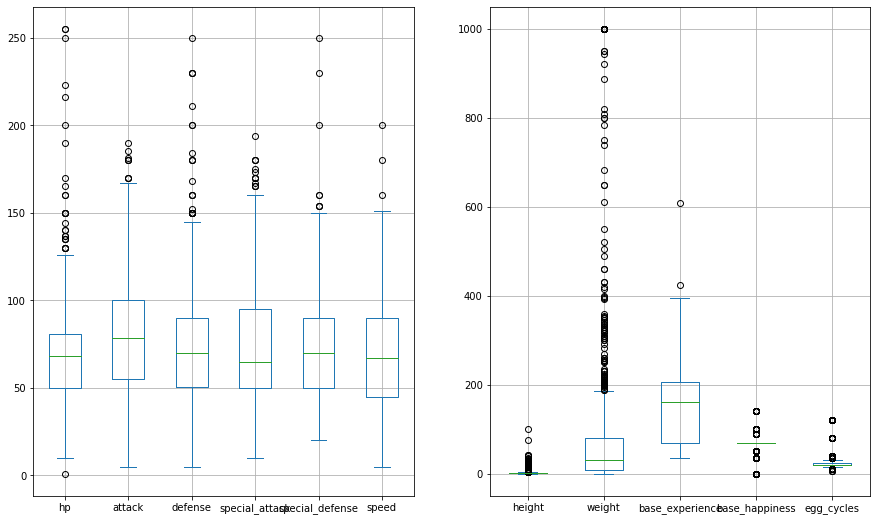

In [39]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(15, 9))
pokedex[stats].plot.box(grid=True, ax=ax0)
pokedex[traits].plot.box(grid=True, ax=ax1)
plt.show()

Osserviamo adesso i Box Plot della somma delle statistiche di base, metrica utilizzata nel meta-game per introdurre dei cap nei tornei ufficiali, per ognuna delle quattro categorie di Pokémon.

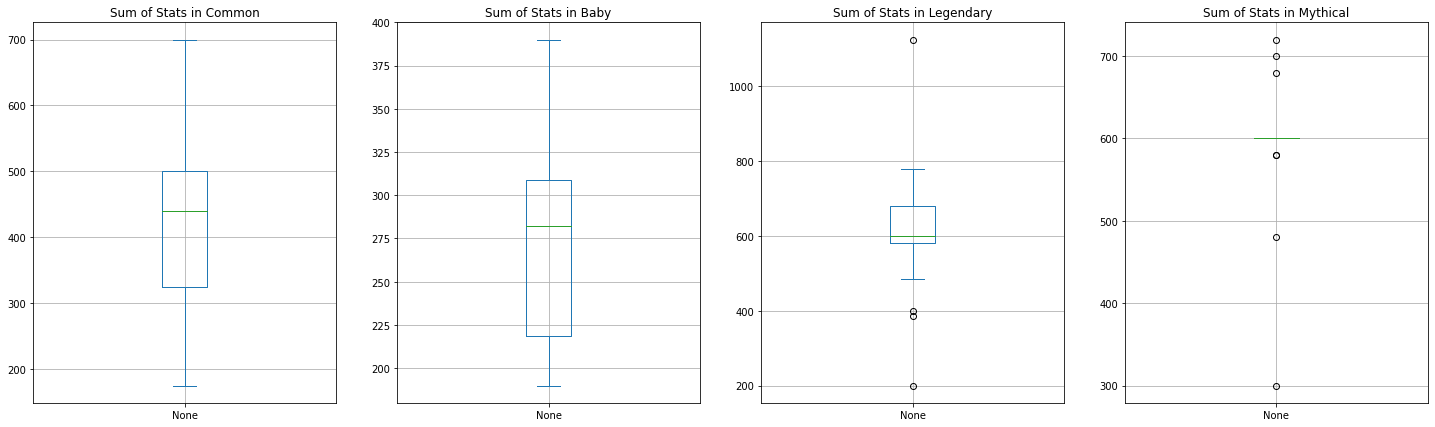

In [40]:
common_stats = common[stats]
baby_stats = baby[stats]
leg_stats = leg[stats]
myth_stats = myth[stats]

common_sum_stats = common_stats.sum(1)
baby_sum_stats = baby_stats.sum(1)
leg_sum_stats = leg_stats.sum(1)
myth_sum_stats = myth_stats.sum(1)

plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
plt.title("Sum of Stats in Common")
common_sum_stats.plot.box(grid=True)
plt.subplot(1,4,2)
plt.title("Sum of Stats in Baby")
baby_sum_stats.plot.box(grid=True)
plt.subplot(1,4,3)
plt.title("Sum of Stats in Legendary")
leg_sum_stats.plot.box(grid=True)
plt.subplot(1,4,4)
plt.title("Sum of Stats in Mythical")
myth_sum_stats.plot.box(grid=True)
plt.show()

Se le prime due sotto-popolazioni hanno dei valori nella norma (escludendo gli estremi superiori ed inferiori nella categoria Common, causati da molte forme Mega/Gigamax nel primo caso, e da Pokémon estremamente deboli nel secondo), è possibile notare degli outlier tra i leggendari e i mitici. Si tratta in questo caso di Pokémon con statistiche così tanto fuori scala, da avere una somma delle statistiche di base più unica, che rara: si tratta del caso di *Eternatus Eternamax* per i leggendari e *Arceus* per i mitici.

Cionondimeno, potrebbe essere interessante analizzare più approfonditamente le statistiche di base, prese singolarmente.

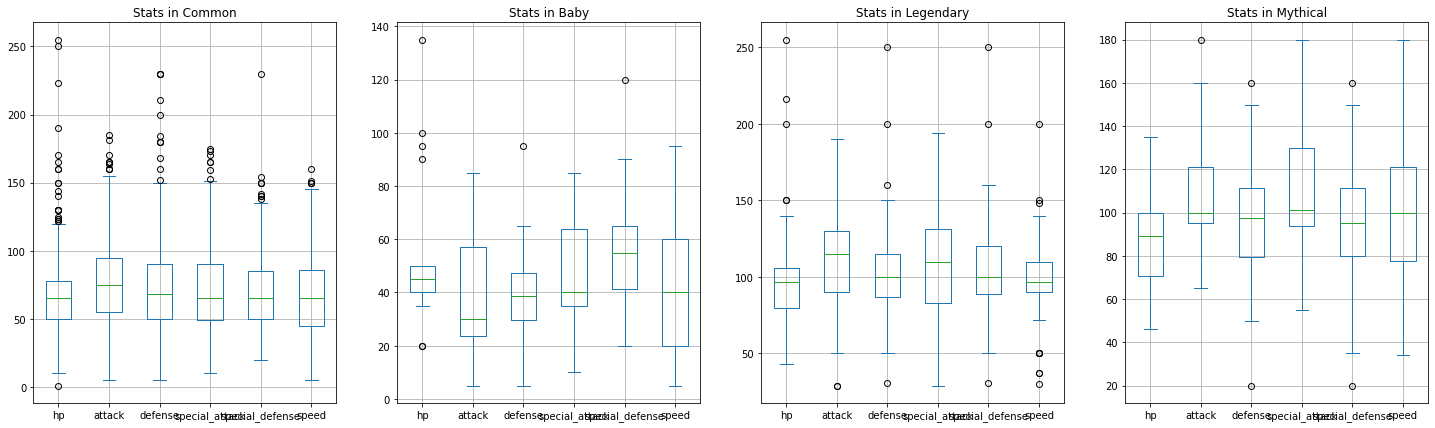

In [41]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(25, 7))

common_stats.plot.box(grid=True, title="Stats in Common", ax=ax0)
baby_stats.plot.box(grid=True, title="Stats in Baby", ax=ax1)
leg_stats.plot.box(grid=True, title="Stats in Legendary", ax=ax2)
myth_stats.plot.box(grid=True, title="Stats in Mythical", ax=ax3)
plt.show()

Osserviamo adesso i box plot di tutti i dati secondari, presi singolarmente per ognuna delle sotto-popolazioni.

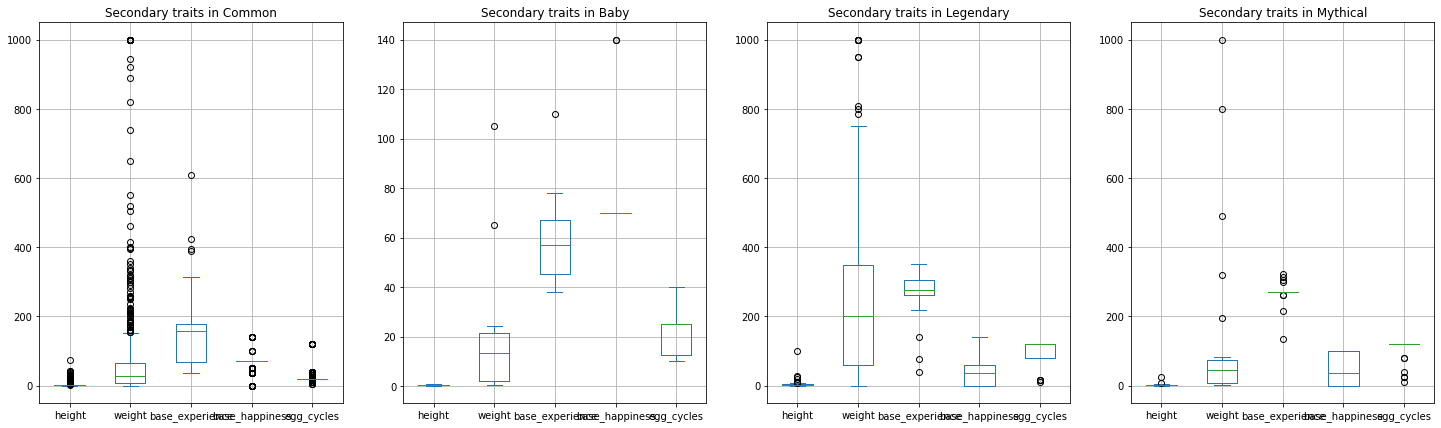

In [42]:
common_traits = common[traits]
baby_traits = baby[traits]
leg_traits = leg[traits]
myth_traits = myth[traits]

fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(25, 7))

common_traits.plot.box(grid=True, title="Secondary traits in Common", ax=ax0)
baby_traits.plot.box(grid=True, title="Secondary traits in Baby", ax=ax1)
leg_traits.plot.box(grid=True, title="Secondary traits in Legendary", ax=ax2)
myth_traits.plot.box(grid=True, title="Secondary traits in Mythical", ax=ax3)
plt.show()

### 4.2.3 Distribuzioni di probabilità e indici di forma

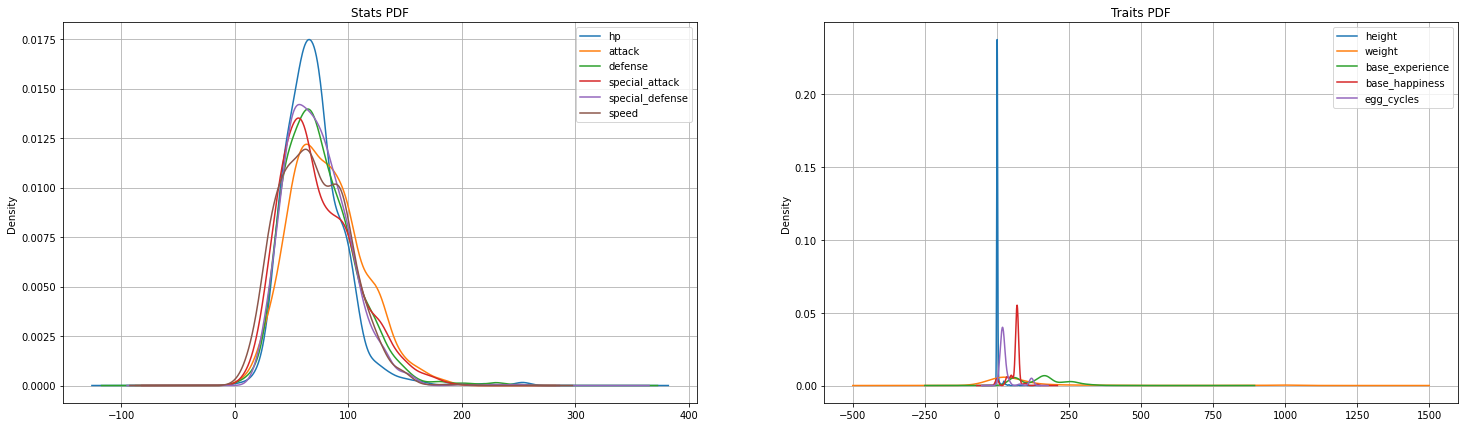

In [43]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(25, 7))
pokedex[stats].plot.density(grid=True, ax=ax0, title="Stats PDF")
pokedex[traits].plot.density(grid=True, ax=ax1, title="Traits PDF")
plt.show()

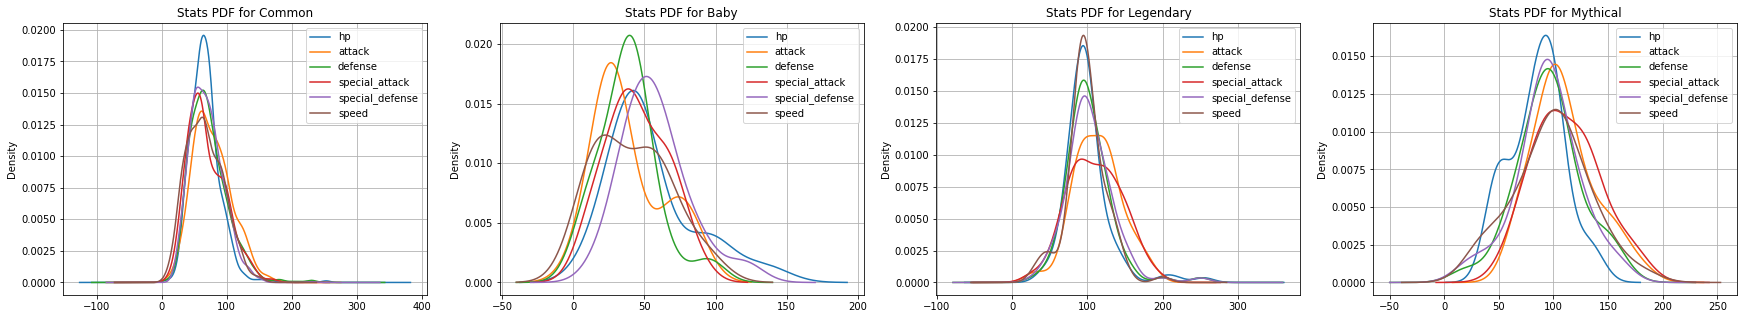

In [44]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(30, 5))

common[stats].plot.density(grid=True, ax=ax0, title="Stats PDF for Common")
baby[stats].plot.density(grid=True, ax=ax1, title="Stats PDF for Baby")
leg[stats].plot.density(grid=True, ax=ax2, title="Stats PDF for Legendary")
myth[stats].plot.density(grid=True, ax=ax3, title="Stats PDF for Mythical")
plt.show()

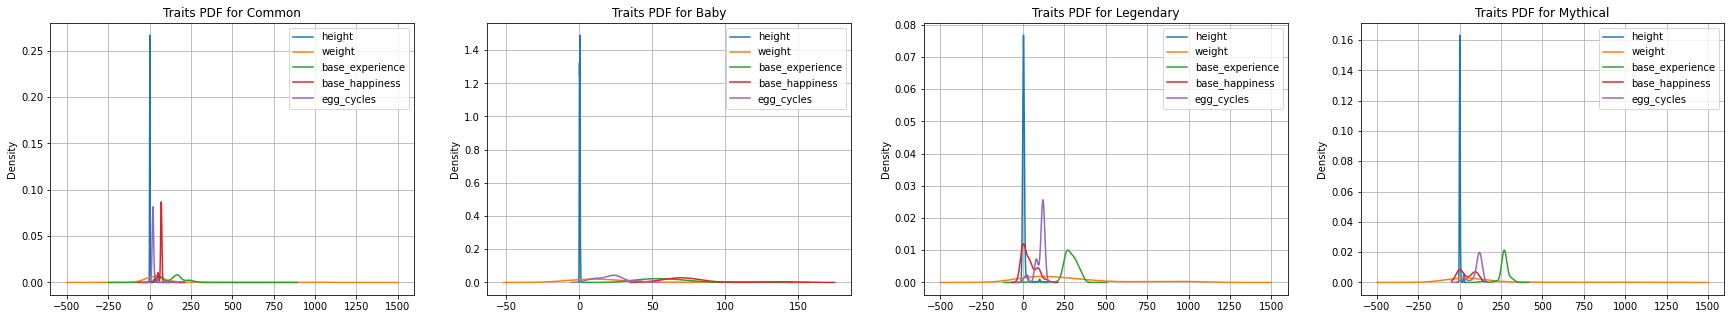

In [45]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(30, 5))

common[traits].plot.density(grid=True, ax=ax0, title="Traits PDF for Common")
baby[traits].plot.density(grid=True, ax=ax1, title="Traits PDF for Baby")
leg[traits].plot.density(grid=True, ax=ax2, title="Traits PDF for Legendary")
myth[traits].plot.density(grid=True, ax=ax3, title="Traits PDF for Mythical")
plt.show()

#### Asimmetria

Osserviamo anzitutto il momento terzo sugli attributi dell'intero Pokédex in generale.

In [46]:
pokedex[attr].skew()

hp                 1.755288
attack             0.473899
defense            1.135564
special_attack     0.712850
special_defense    0.909908
speed              0.389070
capture_rate       0.953397
female_rate       -0.087154
height             8.613147
weight             3.465405
base_experience    0.464897
base_happiness    -1.046097
egg_cycles         2.419157
dtype: float64

È possibile osservare come i dati siano prevalentemente, anche se di poco, distribuiti a destra, visti gli indici positivi, confermando quanto visto nelle gaussiane relative a tutti i valori numerici che caratterizzano i Pokémon. Fa eccezione a questa regola solamente la colonna "female_rate", la quale è leggermente sbilanciata verso sinistra (essendo vicina a zero, potremmo dire che approssimativamente simmetrica), e la colonna "base_happiness".

Andiamo ad analizzare la skewness in base alle sotto-popolazioni.

In [47]:
common_skew = common.skew()
baby_skew = baby.skew()
leg_skew = leg.skew()
myth_skew = myth.skew()

subpop_skew = pd.concat([common_skew, baby_skew, leg_skew, myth_skew], axis=1).transpose().set_axis(subpops)
subpop_skew

hp    attack   defense  special_attack  special_defense  \
Common     1.812839  0.498146  1.251606        0.676980         0.750252   
Baby       1.460660  0.841359  0.930486        0.171075         1.060705   
Legendary  2.376294  0.011294  1.645293        0.058997         1.301581   
Mythical   0.012057  0.676745 -0.015272        0.345818        -0.259245   

              speed  capture_rate  female_rate    height    weight  \
Common     0.384709      0.963669    -0.220435  7.013988  4.014828   
Baby       0.432583      0.370777     0.193556  0.400634  2.483817   
Legendary  0.299722      3.267813     4.588017  7.369057  1.399683   
Mythical  -0.008444      2.086084     0.000000  5.055854  2.961922   

           base_experience  base_happiness  egg_cycles  
Common            0.547650       -0.823660    5.854562  
Baby              1.453678        2.705788    0.392041  
Legendary        -2.352290        0.914777   -2.168584  
Mythical         -2.713770        0.160397   -2.128205

Anche in questo caso è possibile notare come prevalentemente gli indici siano positivi, e come quindi come per la maggior parte degli attributi, i valori siano raggruppati verso destra. Per quanto concerne questi andamenti positivi, notiamo come i maggior indici di asimmetria sono quelli relativi ai leggendari (eccetto che per la colonna "special_attack", la quale è approssimativamente simmetrica): il più estremo da questo punto di vista è quello relativo al tratto secondario "height", come anche confermato dalla gaussiana presentata nel precedente paragrafo.

L'unico indice nullo è quello relativo al "female_rate" per i mitici, vista la mancanza di esemplari femminili per questa categoria. In realtà, relativamente a questa sottopopolazione, molte delle caratteristiche utilizzate in battaglia hanno un indice di skewness approssimativamente vicino a zero (negativamente o positivamente), fa accezione da questo punto di vista solamente quello relativo all'altezza, il quale ha valori prevalentemente raggruppati verso destra.

#### Curtosi

Generalmente, gli eccessi di curtosi sono molto variegati sulla popolazione dell'intero dataset. Prevalentemente gli attributi sono caratterizzati da curve leptocurtiche, con eccezione per "attack", praticamente mesocurtico in quanto approssimativamente vicino a zero, e "speed", "capture_rate" e "female_rate", i quali sono contraddistinti da curve piane.

Tra tutti gli indicatori, spicca quello relativo a "height", il quale - come possibile notare anche dalla PDF sopra presentata - è contraddistinto da una curva molto appuntita.

In [48]:
pokedex[attr].kurt()

hp                   8.037117
attack               0.003433
defense              2.864594
special_attack       0.182917
special_defense      2.304217
speed               -0.115302
capture_rate        -0.370264
female_rate         -0.248646
height             104.512170
weight              11.607012
base_experience      0.224770
base_happiness       3.925261
egg_cycles           4.303882
dtype: float64

Analizziamo adesso il medesimo momento quarto relativamente alle diverse categorie di Pokémon individuate.

In [49]:
common_kurt = common.kurt()
baby_kurt = baby.kurt()
leg_kurt = leg.kurt()
myth_kurt = myth.kurt()

subpop_kurt = pd.concat([common_kurt, baby_kurt, leg_kurt, myth_kurt], axis=1).transpose().set_axis(subpops)
subpop_kurt

hp    attack   defense  special_attack  special_defense  \
Common     9.375637  0.030820  3.201265        0.138682         1.457473   
Baby       1.742033 -0.627194  2.370033       -0.727395         1.752873   
Legendary  9.074176  0.247930  6.683414       -0.430270         4.842542   
Mythical  -0.356438  0.110536  0.735267       -0.334050         0.957446   

              speed  capture_rate  female_rate     height     weight  \
Common    -0.309793     -0.507003     0.565662  63.962522  15.841029   
Baby      -0.698236     -0.705475    -0.626393  -0.286703   6.619880   
Legendary  2.552849      9.292452    20.505944  60.579076   0.968060   
Mythical   0.087725      2.632556     0.000000  26.985527   8.551915   

           base_experience  base_happiness  egg_cycles  
Common            1.629595        9.675228   40.979031  
Baby              3.197322        5.976563    0.069738  
Legendary         9.648419       -0.218583    4.361529  
Mythical         12.751312       -1.919330    3.150374

Osservando gli indici per categoria, è interessante notare come il maggior eccesso di curtosi della popolazione sia causato prevalentemente dalle altezze presenti nelle due categorie, Legendary e Common soprattutto. Sulla categoria Baby, si trova invece una curva platicurtica relativa al rispettivo attributo "height". 

Sui misteriosi, invece, è possibile notare una distribuzione rappresentata da una curva mesocurtica, indice non dissimile al momento terzo, considerando che in questa categoria non sono presenti esemplari femminili, e che quindi la loro probabilità di ritrovamento è praticamente nulla.

### 5. Analisi delle distribuzioni e fitting
Prendiamo come riferimento per una seconda volta la somma delle statistiche d'attacco dell'intero Pokédex, e verifichiamo quanto effettivamente la sua distribuzione segue un fitting gaussiano.

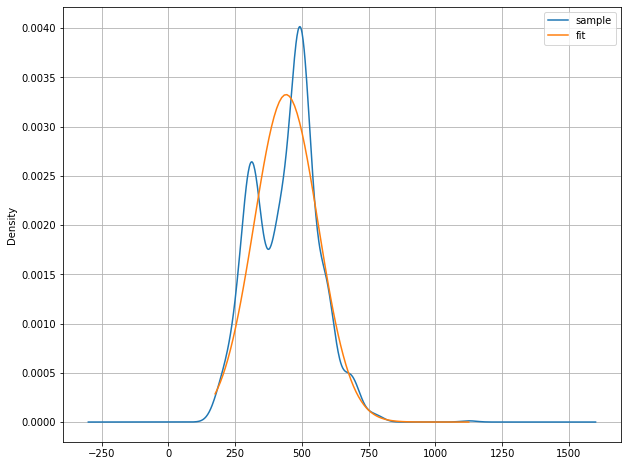

In [50]:
sample = pokedex[stats].sum(1)
plt.figure(figsize=(10,8))
pd.Series(sample).plot.density()
g=norm(*norm.fit(sample))
x=np.linspace(sample.min(),sample.max(),100)
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['sample','fit'])
plt.show()

Osservando i grafici delle normali, ci rendiamo conto del fatto che i dati sono effettivamente approssimabili ad una normale. Rispetto al suo fit, notiamo che, come anche già detto in precedenza, la distribuzione dei dati ha due mode.

Andiamo a verificare lo stesso tipo di distribuzione in base alle quattro sotto-popolazioni presenti nel dataset.

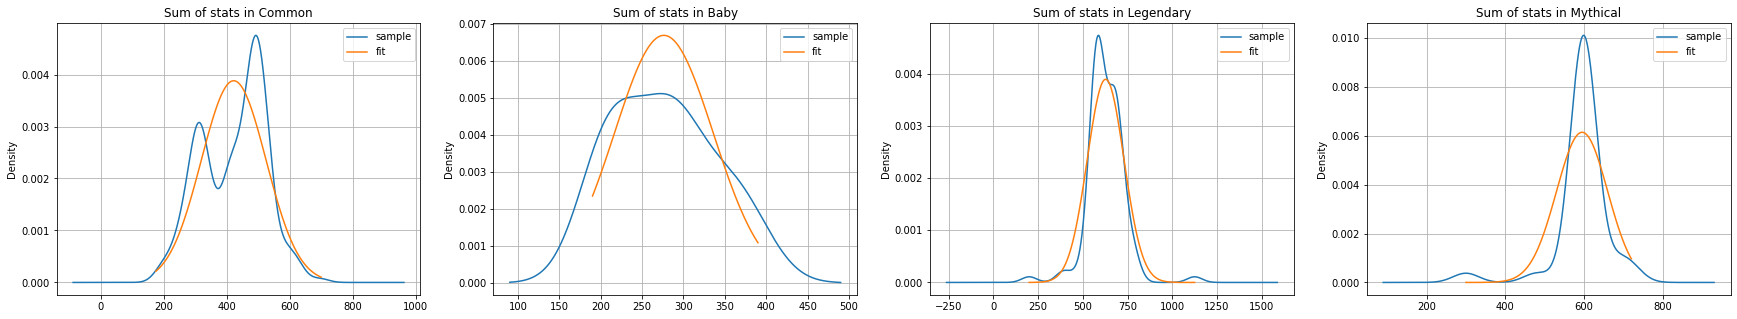

In [51]:
sample_common = common[stats].sum(1)
sample_leg = leg[stats].sum(1)
sample_baby = baby[stats].sum(1)
sample_myth = myth[stats].sum(1)

samples = [sample_common, sample_baby, sample_leg, sample_myth]
axes = [ax0,ax1,ax2,ax3]

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
s = 0
ax = 0
while s < len(samples) and ax < len(axes):
    pd.Series(samples[s]).plot.density(ax=axes[ax], grid=True, title="Sum of stats in " + subpops[s])
    g=norm(*norm.fit(samples[s]))
    x=np.linspace(samples[s].min(),samples[s].max(),100)
    axes[ax].plot(x,g.pdf(x))
    axes[ax].legend(['sample','fit'])

    s += 1
    ax += 1


Si può notare come prevalentemente tutte le sotto-popolazioni abbiano un buon fitting gaussiano. Ci sono tuttavia una serie di considerazioni da fare per ognuna di esse:
- per quanto riguarda Common, notiamo un andamento molto simile a quello dell'intero dataset: ciò ha senso se consideriamo che la maggioranza dell'intero dataset è contenuto in questo gruppo. Per cui, le due mode di distribuzione della somma delle statistiche, dipende principalmente da questa classe;
- su Baby, il fitting gaussiano è leggermente più rialzato rispetto al reale andamento dei dati:
- su Legendary, il fitting gaussiano è molto buono;
- su Mythicals, la differenza è più che altro relativa all'altezza della normale che rappresenta i dati, rispetto alla normale di riferimento per il fitting.

Confermiamo (o smentiamo, a seconda dei futuri risultati) quanto detto eseguendo prima un test di gaussianità basato sui Q-Q plot.

#### Q-Q Plot

Diamo anzitutto al Q-Q plot relativo alla somma delle statistiche poer l'intero dataset.

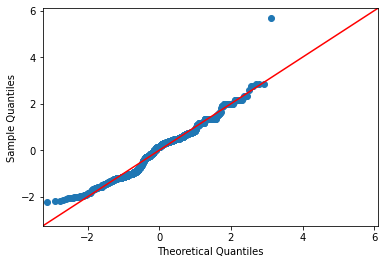

In [52]:
qqplot(sample, fit=True, line='45')
plt.show()

Possiamo notare che la distribuzione assume un buon fitting secondo il grafico, principalmente dai valori Z-scored nell'intervallo [-2, 3], confermando quanto visto in precedenza.

Andiamo tuttavia ad analizzare tutte i valori, presi singolarmente, sia relativamente alle statistiche, sia relativamente ai tratti secondari, in modo da verificare quanto visto nei grafici delle PDF visti all'inizio di questo paragrafo.

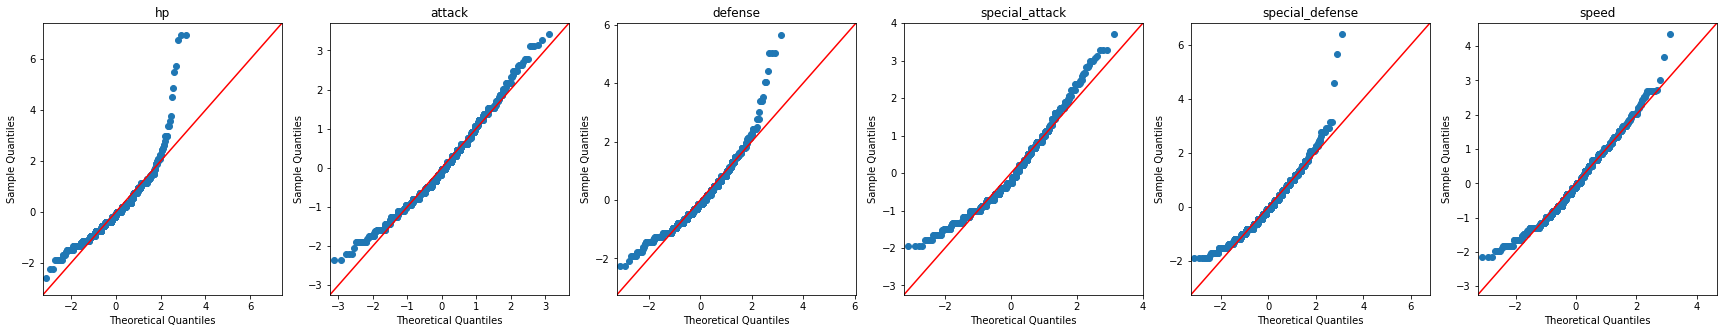

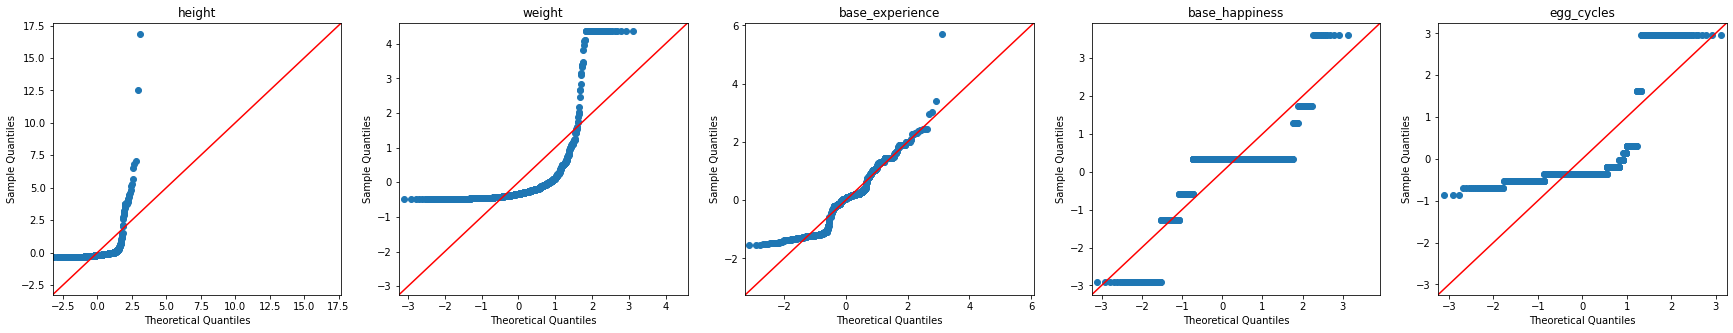

In [53]:
fig, axis = plt.subplots(1, 6, figsize=(30, 5))

for i in range(len(stats)):
    axis[i].set_title(stats[i])
    qqplot(pokedex[stats[i]], fit=True, line='45', ax=axis[i])

fig, axis = plt.subplots(1, len(traits), figsize=(30, 5))

for i in range(len(traits)):
    axis[i].set_title(traits[i])
    qqplot(pokedex[traits[i]], fit=True, line='45', ax=axis[i])
 

Per quanto concerne i le statistiche di lotta prese singolarmente, è possibile notare che tutte seguono un buon fitting solamente in alcuni intervalli interquantili, ma tutti i grafici sono accumulati dall'essere asimmetrici a destra: il che spiega per quale motivo tutte le PDF mostrate verso l'inizio di questo paragrafo sono "ammassate" verso la destra del loro intervallo di definizione.

Generalmente, per i tratti secondari, notiamo che nessuna delle loro distribuzioni segue un buon fitting gaussiano (il che ha anche senso, osservando le PDF viste prima). Fa eccezione solamente la distribuzione dell'esperienza di base, che sembra assumere approssimativamente un fitting accettabile tra il quantile 0 ed il quantile 3.

### 6. Correlazione

Eseguiamo adesso una valutazione della correlazione tra le colonne del dataset.

Cominciamo, innanzitutto, con le colonne che abbiamo esaminato sino ad adesso, ossia quelle relative agli attributi (sia statistiche di lotta e tratti secondari) di ogni singolo esemplare di Pokémon.

In [54]:
pokedex[attr].corr('pearson')

hp    attack   defense  special_attack  \
hp               1.000000  0.455912  0.312629        0.365686   
attack           0.455912  1.000000  0.458357        0.361679   
defense          0.312629  0.458357  1.000000        0.222580   
special_attack   0.365686  0.361679  0.222580        1.000000   
special_defense  0.391004  0.258264  0.544277        0.499168   
speed            0.154257  0.352437 -0.013382        0.428419   
capture_rate    -0.443778 -0.506777 -0.423743       -0.504598   
female_rate     -0.155032 -0.302479 -0.205195       -0.294853   
height           0.289908  0.183406  0.202732        0.160325   
weight           0.364185  0.326237  0.346026        0.190902   
base_experience  0.655302  0.643654  0.546189        0.684522   
base_happiness  -0.179910 -0.307345 -0.225063       -0.248395   
egg_cycles       0.393290  0.388185  0.291850        0.417802   

                 special_defense     speed  capture_rate  female_rate  \
hp                      0.391004  0.154257     -0.443778    -0.155032   
attack                  0.258264  0.352437     -0.506777    -0.302479   
defense                 0.544277 -0.013382     -0.423743    -0.205195   
special_attack          0.499168  0.428419     -0.504598    -0.294853   
special_defense         1.000000  0.201756     -0.482524    -0.207526   
speed                   0.201756  1.000000     -0.382360    -0.250477   
capture_rate           -0.482524 -0.382360      1.000000     0.363640   
female_rate            -0.207526 -0.250477      0.363640     1.000000   
height                  0.194405  0.079226     -0.089921    -0.070342   
weight                  0.233649  0.041164     -0.219305    -0.168299   
base_experience         0.668664  0.511423     -0.659548    -0.334973   
base_happiness         -0.157103 -0.169636      0.167677     0.315458   
egg_cycles              0.332685  0.326779     -0.366071    -0.509340   

                   height    weight  base_experience  base_happiness  \
hp               0.289908  0.364185         0.655302       -0.179910   
attack           0.183406  0.326237         0.643654       -0.307345   
defense          0.202732  0.346026         0.546189       -0.225063   
special_attack   0.160325  0.190902         0.684522       -0.248395   
special_defense  0.194405  0.233649         0.668664       -0.157103   
speed            0.079226  0.041164         0.511423       -0.169636   
capture_rate    -0.089921 -0.219305        -0.659548        0.167677   
female_rate     -0.070342 -0.168299        -0.334973        0.315458   
height           1.000000  0.752764         0.231081       -0.170528   
weight           0.752764  1.000000         0.364134       -0.299538   
base_experience  0.231081  0.364134         1.000000       -0.291493   
base_happiness  -0.170528 -0.299538        -0.291493        1.000000   
egg_cycles       0.132047  0.281722         0.546382       -0.547297   

                 egg_cycles  
hp                 0.393290  
attack             0.388185  
defense            0.291850  
special_attack     0.417802  
special_defense    0.332685  
speed              0.326779  
capture_rate      -0.366071  
female_rate       -0.509340  
height             0.132047  
weight             0.281722  
base_experience    0.546382  
base_happiness    -0.547297  
egg_cycles         1.000000

I valori della correlazione secondo **Pearson** sembrano confermare in linea generale le analisi effettuate in precedenza.

Relativamente alle statistiche (ognuna di esse rispetto alle altre), notiamo indici che mostrano una lieve correlazione positiva, tranne che per la velocità rispetto alla difesa, che paiono non essere particolarmente correlate.

Una forte correlazione (negativa) è quella del tasso di cattura rispetto alle varie statistiche di lotta: ciò ha senso, perché Pokémon più forti hanno minor tasso di cattura e sono più "testardi" nel farsi catturare (come quanto affermato in precedenza, relativamente ai Leggendari e ai loro valori medi).
Una forte correlazione positiva è espressa invece dall'esperienza di base, rispetto alle statistiche di lotta considerate: infatti, più è forte il Pokémon sconfitto, maggiore esperienza farà guadagnare al proprio, al termine della battaglia. 
Altri interessanti indici da osservare, sono quelli in corrispondenza dell'attributo "egg_cycles": relativamente al rapporto con le statistiche, troviamo lievi indici di correlazione positiva, ma le maggiori correlazioni sono presentate dal rapporto rispetto alla "female_rate" (negativa), rispetto alla "base_experience" (positiva), e rispetto alla "base_happiness" (negativa anch'essa); infatti, un Pokémon con alta probabilità di essere trovato di sesso femminile, ha generalmente bisogno di più tempo per uscire dal suo uovo, così come ne hanno bisogno Pokémon che garantiscono un maggior cumulativo di esperienza se sconfitti (e quindi, più forti o più rari) e come ne hanno bisogno altri che hanno minor cumulativo di "affetto" alla loro nascita (in quanto, nella fauna sarebbero più rari). 

Si può notare, invece, come la più blanda correlazione sia rappresentata dagli indici di altezza e di peso, tutti molto vicini allo zero: concludiamo quindi, che tratti come l'altezza o il peso hanno, in generale, poco a che fare con la forza di un Pokémon. Un semplice esempio potrebbe essere dato dalla correlazione tra peso e velocità: logica vorrebbe che Pokémon più pesanti siano più lenti, eppure l'indice di correlazione in corrispondenza di questi due attributi è quello più vicino allo zero, e quindi quello che più, tra tutti, indica una mancanza di correlazione.

Vista la presenza di alcuni outliers (soprattutto in presenza di leggendari e forme Gigamax), osserviamo indici più robusti del coefficiente di Pearson.

In [55]:
pokedex[attr].corr('spearman')

hp    attack   defense  special_attack  \
hp               1.000000  0.587648  0.465905        0.472056   
attack           0.587648  1.000000  0.514515        0.351676   
defense          0.465905  0.514515  1.000000        0.310931   
special_attack   0.472056  0.351676  0.310931        1.000000   
special_defense  0.485430  0.312357  0.598619        0.562087   
speed            0.226226  0.341000  0.041170        0.418245   
capture_rate    -0.492197 -0.514128 -0.465402       -0.538716   
female_rate     -0.188033 -0.294176 -0.226958       -0.295276   
height           0.640472  0.602063  0.487390        0.460222   
weight           0.607439  0.566388  0.528571        0.334012   
base_experience  0.724470  0.688395  0.639289        0.709814   
base_happiness  -0.134949 -0.230927 -0.165740       -0.159093   
egg_cycles       0.312577  0.356412  0.305645        0.360931   

                 special_defense     speed  capture_rate  female_rate  \
hp                      0.485430  0.226226     -0.492197    -0.188033   
attack                  0.312357  0.341000     -0.514128    -0.294176   
defense                 0.598619  0.041170     -0.465402    -0.226958   
special_attack          0.562087  0.418245     -0.538716    -0.295276   
special_defense         1.000000  0.244665     -0.523393    -0.234913   
speed                   0.244665  1.000000     -0.401439    -0.248614   
capture_rate           -0.523393 -0.401439      1.000000     0.492694   
female_rate            -0.234913 -0.248614      0.492694     1.000000   
height                  0.464096  0.273560     -0.465496    -0.181543   
weight                  0.428625  0.146739     -0.421366    -0.231140   
base_experience         0.715204  0.515328     -0.714094    -0.362316   
base_happiness         -0.100234 -0.096056      0.206808     0.225905   
egg_cycles              0.312184  0.210883     -0.531917    -0.463661   

                   height    weight  base_experience  base_happiness  \
hp               0.640472  0.607439         0.724470       -0.134949   
attack           0.602063  0.566388         0.688395       -0.230927   
defense          0.487390  0.528571         0.639289       -0.165740   
special_attack   0.460222  0.334012         0.709814       -0.159093   
special_defense  0.464096  0.428625         0.715204       -0.100234   
speed            0.273560  0.146739         0.515328       -0.096056   
capture_rate    -0.465496 -0.421366        -0.714094        0.206808   
female_rate     -0.181543 -0.231140        -0.362316        0.225905   
height           1.000000  0.857008         0.693885       -0.265743   
weight           0.857008  1.000000         0.610520       -0.261529   
base_experience  0.693885  0.610520         1.000000       -0.225186   
base_happiness  -0.265743 -0.261529        -0.225186        1.000000   
egg_cycles       0.322566  0.324366         0.409212       -0.353893   

                 egg_cycles  
hp                 0.312577  
attack             0.356412  
defense            0.305645  
special_attack     0.360931  
special_defense    0.312184  
speed              0.210883  
capture_rate      -0.531917  
female_rate       -0.463661  
height             0.322566  
weight             0.324366  
base_experience    0.409212  
base_happiness    -0.353893  
egg_cycles         1.000000

In [56]:
pokedex[attr].corr('kendall')

hp    attack   defense  special_attack  \
hp               1.000000  0.431030  0.348791        0.336539   
attack           0.431030  1.000000  0.371794        0.247920   
defense          0.348791  0.371794  1.000000        0.215975   
special_attack   0.336539  0.247920  0.215975        1.000000   
special_defense  0.349075  0.216648  0.467821        0.415196   
speed            0.154061  0.237029  0.027110        0.296788   
capture_rate    -0.370806 -0.382334 -0.349688       -0.408188   
female_rate     -0.148389 -0.230812 -0.178757       -0.232394   
height           0.481316  0.438667  0.357136        0.328533   
weight           0.444477  0.404485  0.383257        0.228702   
base_experience  0.546615  0.509977  0.473748        0.529664   
base_happiness  -0.107181 -0.183587 -0.130972       -0.127687   
egg_cycles       0.242900  0.274187  0.235206        0.279313   

                 special_defense     speed  capture_rate  female_rate  \
hp                      0.349075  0.154061     -0.370806    -0.148389   
attack                  0.216648  0.237029     -0.382334    -0.230812   
defense                 0.467821  0.027110     -0.349688    -0.178757   
special_attack          0.415196  0.296788     -0.408188    -0.232394   
special_defense         1.000000  0.170086     -0.396979    -0.186509   
speed                   0.170086  1.000000     -0.291935    -0.194834   
capture_rate           -0.396979 -0.291935      1.000000     0.417516   
female_rate            -0.186509 -0.194834      0.417516     1.000000   
height                  0.338901  0.190919     -0.363061    -0.144692   
weight                  0.304288  0.100718     -0.315408    -0.180953   
base_experience         0.535545  0.362548     -0.583194    -0.282856   
base_happiness         -0.079406 -0.076176      0.174928     0.202252   
egg_cycles              0.241921  0.160236     -0.446772    -0.405390   

                   height    weight  base_experience  base_happiness  \
hp               0.481316  0.444477         0.546615       -0.107181   
attack           0.438667  0.404485         0.509977       -0.183587   
defense          0.357136  0.383257         0.473748       -0.130972   
special_attack   0.328533  0.228702         0.529664       -0.127687   
special_defense  0.338901  0.304288         0.535545       -0.079406   
speed            0.190919  0.100718         0.362548       -0.076176   
capture_rate    -0.363061 -0.315408        -0.583194        0.174928   
female_rate     -0.144692 -0.180953        -0.282856        0.202252   
height           1.000000  0.709258         0.525790       -0.209917   
weight           0.709258  1.000000         0.441259       -0.202392   
base_experience  0.525790  0.441259         1.000000       -0.179776   
base_happiness  -0.209917 -0.202392        -0.179776        1.000000   
egg_cycles       0.253317  0.248810         0.318767       -0.323412   

                 egg_cycles  
hp                 0.242900  
attack             0.274187  
defense            0.235206  
special_attack     0.279313  
special_defense    0.241921  
speed              0.160236  
capture_rate      -0.446772  
female_rate       -0.405390  
height             0.253317  
weight             0.248810  
base_experience    0.318767  
base_happiness    -0.323412  
egg_cycles         1.000000

Osservando gli indici di Spearman prima e di Kendall successivamente, notiamo come vi siano delle evidenti differenze rispetto all'indice di Pearson.\
In entrambi i casi, infatti, si registra una più evidente correlazione tra tratti secondari, come peso e altezza, e le varie statistiche di lotta, soprattutto nel caso di Spearman: addirittura, osservando il rapporto tra altezza e HP, si registra un valore circa due volte maggiore. Considerando che questi due indici sono molto meno sensibili agli outlier, rispetto al primo utilizzato, è possibile affermare che una buona dose di record con caratteristiche estreme abbia "inquinato" la correlazione secondo Pearson.

Altre caratteristiche già correlate in precendenza, invece, in questi due nuovi casi studio diventano ancora più evidenti. Si noti, per esempio, come secondo Spearman vi sia una correlazione molto forte tra quantitativo di punti vita e esperienza fornita alla fine di una lotta.

Per quanto riguarda Kendall, in generale sembra fornire indici nella via di mezzo tra Pearson e Spearman, ma che comunque confermano quanto detto.

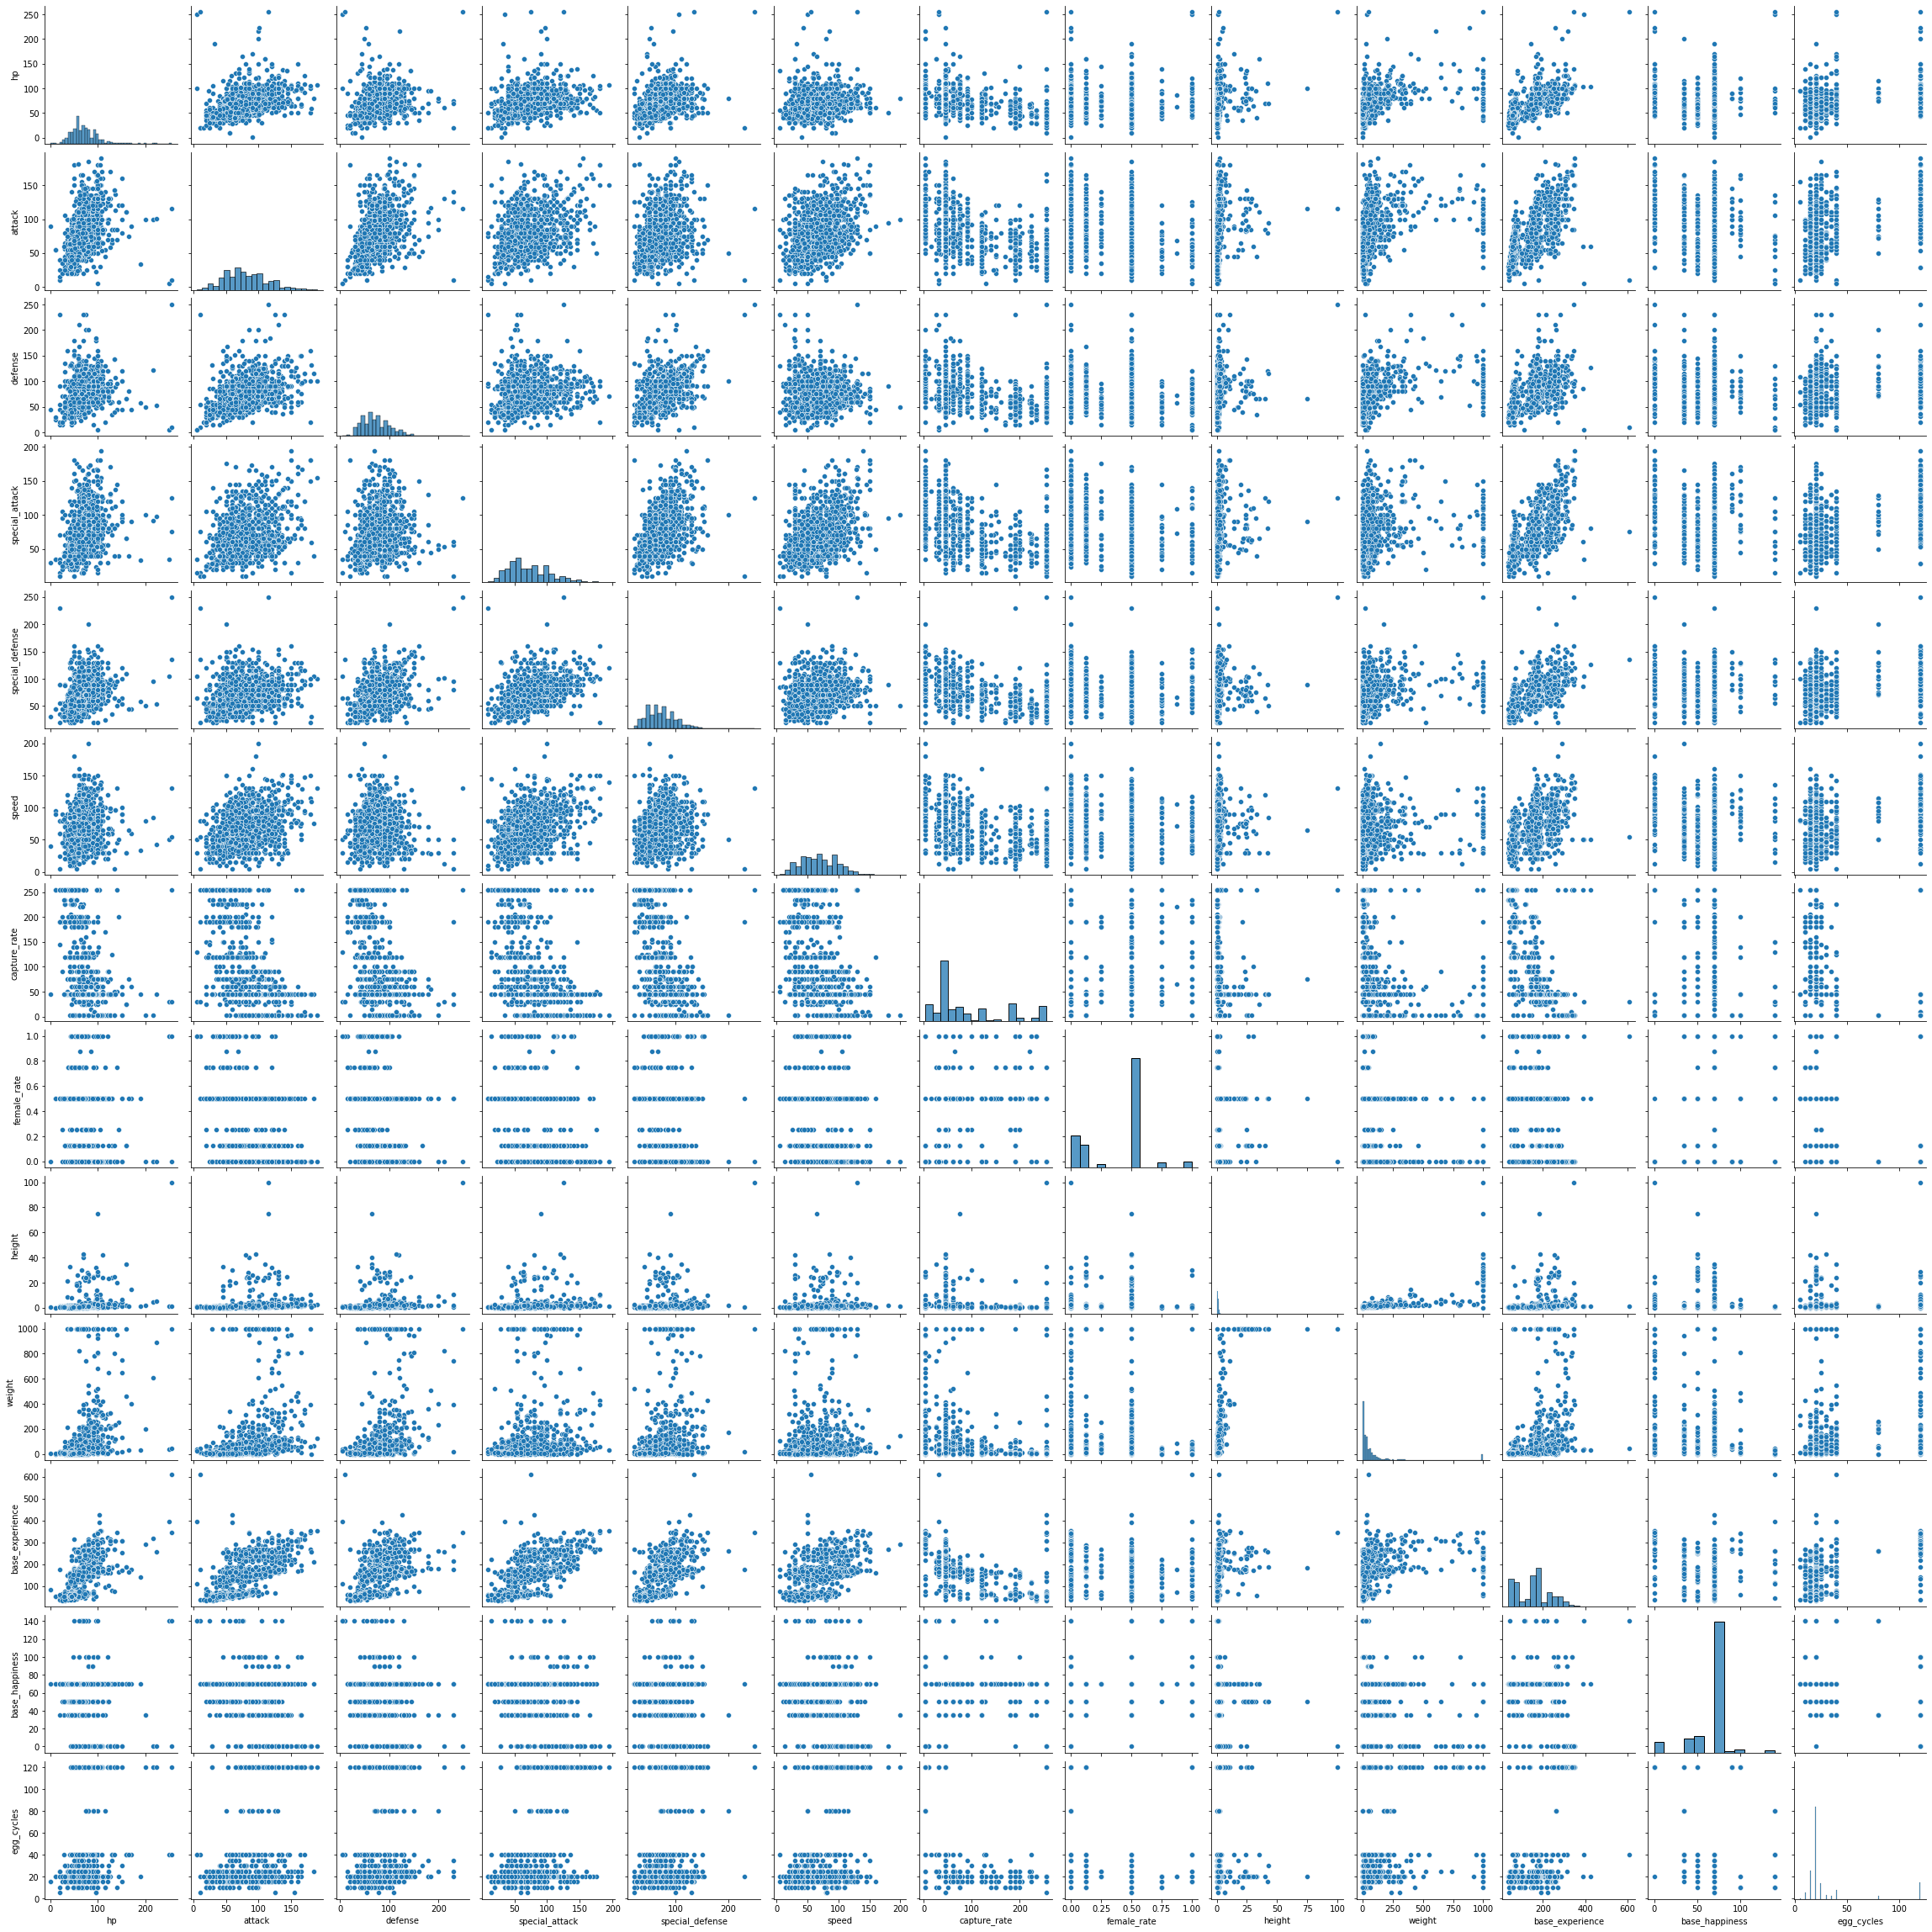

In [57]:
sns.pairplot(pokedex[attr])

Andiamo ad analizzare una serie di attributi che, fino a questo momento, sono stati accantonati nel corso dell'analisi.\
Nel metagame, un aspetto rilevante è l'efficacia di una mossa di un certo tipo, rispetto ad un Pokémon di un altro tipo. Per esempio, se un Pokémon di tipo Fuoco viene colpito da un attacco di tipo acqua, il danno che gli sarà inflitto sarà dimezzato; viceversa, se un Pokémon di tipo Acqua, viene colpito da un attacco di tipo fuoco, il danno ricevuto sarà dimezzato.\
È possibile riassumere l'efficacia tra tipi in questo modo:
- attacco inefficace: $0 \times danno$;
- attacco poco efficace: $0.25 \times danno$;
- attacco efficace: $1 \times danno$;
- attacco superefficace: $2 \times danno$.

Poiché alcuni esemplari sono caratterizzati da due tipi, e possibile che l'efficacia si rifletta si entrambi i tipi, e che quindi i moltiplicatori si congiungano fino ad arrivare a quadruplicare il danno in questione. Per esempio: se un attacco di tipo Erba colpisce un Pokémon di tipo Acqua/Terra (il tipo Erba è superefficace su entrambi), allora l'output di danno inflitto sarà quadruplicato.

Tornando al dataset, oltre alle colonne esaminate sino ad adesso, esso è caratterizzato da ulteriori 18 attributi del tipo "*type*_attack_effectiveness", che ne definiscono la sua debolezza (intesa come moltiplicatore del danno, per cui i valori variano da nell'intervallo [0,4]) rispetto ad ognuno di essi. Partendo da questi attributi, si potrebbe costruire una tabella di stima delle efficacie di ognuno dei 18 tipi sugli altri, utilizzando il concetto di correlazione e di normalizzazione nell'intervallo [0,2].   

In [58]:
effectiveness = ['normal_attack_effectiveness', 'fire_attack_effectiveness', 'water_attack_effectiveness',\
                'electric_attack_effectiveness', 'grass_attack_effectiveness', 'ice_attack_effectiveness',\
                'fighting_attack_effectiveness', 'poison_attack_effectiveness', 'ground_attack_effectiveness',\
                'fly_attack_effectiveness', 'psychic_attack_effectiveness', 'bug_attack_effectiveness',\
                'rock_attack_effectiveness', 'ghost_attack_effectiveness', 'dragon_attack_effectiveness',\
                'dark_attack_effectiveness', 'steel_attack_effectiveness', 'fairy_attack_effectiveness']

att_eff = pokedex[effectiveness].corr('spearman')
att_eff = 2*(att_eff-att_eff.min())/(att_eff.max()-att_eff.min())
att_eff

normal_attack_effectiveness  \
normal_attack_effectiveness                       2.000000   
fire_attack_effectiveness                         0.496579   
water_attack_effectiveness                        0.101490   
electric_attack_effectiveness                     0.535110   
grass_attack_effectiveness                        0.430577   
ice_attack_effectiveness                          0.648042   
fighting_attack_effectiveness                     0.512052   
poison_attack_effectiveness                       1.473192   
ground_attack_effectiveness                       0.125019   
fly_attack_effectiveness                          1.136118   
psychic_attack_effectiveness                      0.768234   
bug_attack_effectiveness                          0.960037   
rock_attack_effectiveness                         0.823506   
ghost_attack_effectiveness                        0.000000   
dragon_attack_effectiveness                       0.917808   
dark_attack_effectiveness                         0.083545   
steel_attack_effectiveness                        0.362025   
fairy_attack_effectiveness                        0.851437   

                               fire_attack_effectiveness  \
normal_attack_effectiveness                     0.621092   
fire_attack_effectiveness                       2.000000   
water_attack_effectiveness                      0.482299   
electric_attack_effectiveness                   0.240569   
grass_attack_effectiveness                      0.000000   
ice_attack_effectiveness                        0.926469   
fighting_attack_effectiveness                   0.483182   
poison_attack_effectiveness                     0.816154   
ground_attack_effectiveness                     0.235791   
fly_attack_effectiveness                        1.120932   
psychic_attack_effectiveness                    0.502515   
bug_attack_effectiveness                        0.815377   
rock_attack_effectiveness                       0.625524   
ghost_attack_effectiveness                      0.681809   
dragon_attack_effectiveness                     0.128413   
dark_attack_effectiveness                       0.674428   
steel_attack_effectiveness                      0.963278   
fairy_attack_effectiveness                      0.426845   

                               water_attack_effectiveness  \
normal_attack_effectiveness                      0.260658   
fire_attack_effectiveness                        0.483984   
water_attack_effectiveness                       2.000000   
electric_attack_effectiveness                    0.522047   
grass_attack_effectiveness                       0.763495   
ice_attack_effectiveness                         0.508992   
fighting_attack_effectiveness                    0.799838   
poison_attack_effectiveness                      0.000000   
ground_attack_effectiveness                      1.116563   
fly_attack_effectiveness                         0.113421   
psychic_attack_effectiveness                     0.551275   
bug_attack_effectiveness                         0.137523   
rock_attack_effectiveness                        0.715466   
ghost_attack_effectiveness                       0.599315   
dragon_attack_effectiveness                      0.335249   
dark_attack_effectiveness                        0.630048   
steel_attack_effectiveness                       0.857492   
fairy_attack_effectiveness                       0.213794   

                               electric_attack_effectiveness  \
normal_attack_effectiveness                         0.631999   
fire_attack_effectiveness                           0.208574   
water_attack_effectiveness                          0.493498   
electric_attack_effectiveness                       2.000000   
grass_attack_effectiveness                          0.809306   
ice_attack_effectiveness                            0.000000   
fighting_attack_effectiveness                       0.528702   
poison_attack_effectiveness            

<AxesSubplot:>

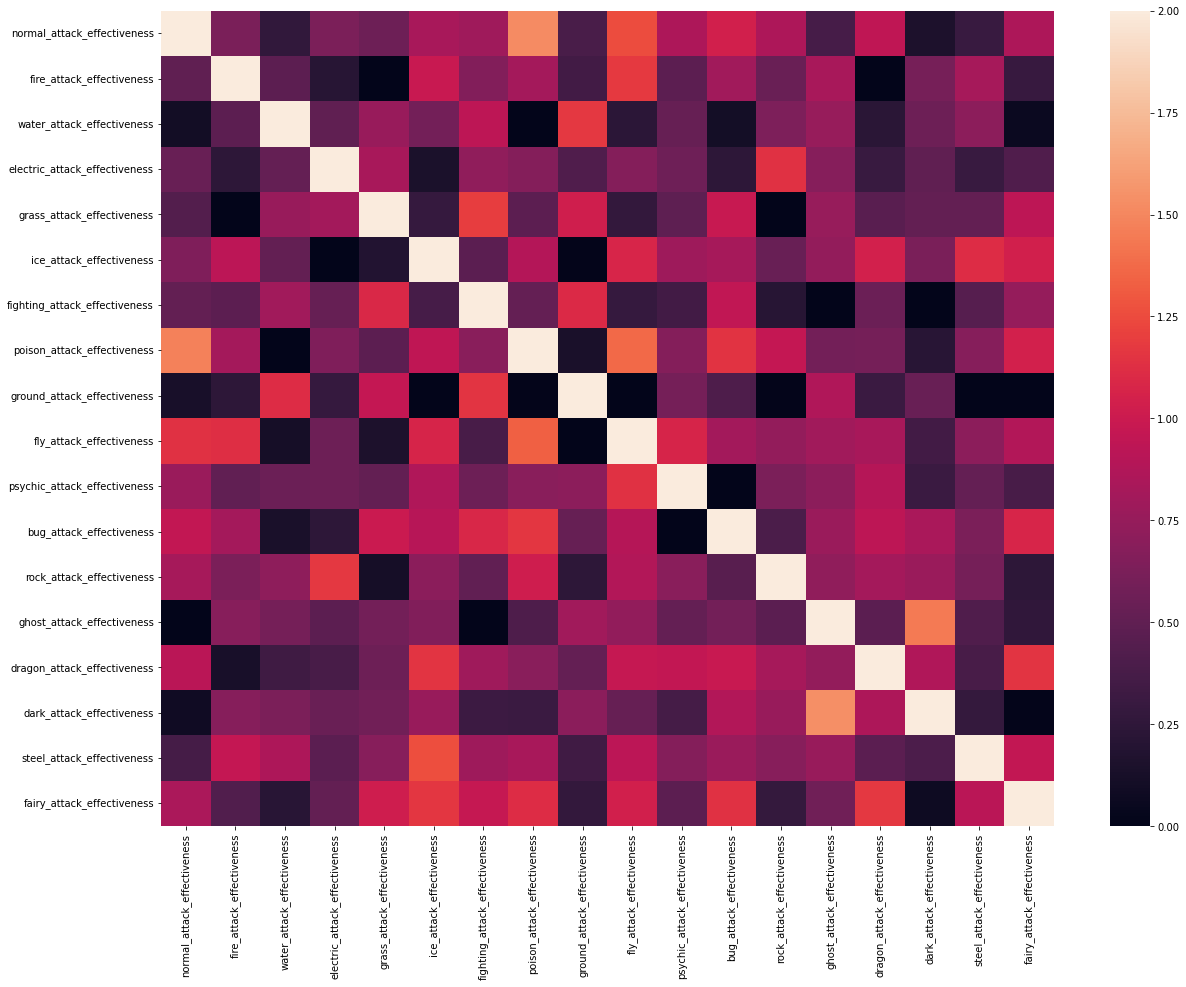

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(att_eff)